# LCLS Archiver restore

These examples show how single snapshots, and time series can be retreived from the archiver appliance.

Note that the times must always be in ISO 8601 format, UTC time (not local time). 


In [1]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from lcls_live.archiver import lcls_archiver_restore
from lcls_live import data_dir
import json
import os

# This is the main function
?lcls_archiver_restore

Signature:
lcls_archiver_restore(
    pvlist,
    isotime='2018-08-11T10:40:00.000-07:00',
    verbose=True,
)
Docstring:
Returns a dict of {'pvname':val} given a list of pvnames, at a time in ISO 8601 format, using the EPICS Archiver Appliance:

https://slacmshankar.github.io/epicsarchiver_docs/userguide.html
File:      ~/GitHub/lcls-live/lcls_live/archiver.py
Type:      function


# Restore known PVs

In [3]:
pvlist = [
          'QUAD:LI21:221:BACT',
'QUAD:LI21:251:BACT',
'QUAD:LI24:860:BACT',
'QUAD:LI24:740:BACT',
'QUAD:LI26:601:BACT', 
'QUAD:LI26:901:BACT',
'QUAD:LI26:501:BACT',
'QUAD:LI26:401:BACT',
'QUAD:LI26:701:BACT',
'QUAD:LI26:201:BACT', 
'QUAD:LTUH:660:BACT', 
'QUAD:LTUH:680:BACT', 
'QUAD:LTUH:640:BACT', 
'QUAD:LTUH:460:BACT',
'QUAD:LTUH:440:BACT',
'QUAD:LTUH:620:BACT', 
'QUAD:LI26:301:BACT',
'QUAD:LI26:801:BACT',
'GDET:FEE1:241:ENRC'
]


lcls_archiver_restore(pvlist, '2022-08-06T22:26:49.000000-07:00')

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2022-08-06T22:26:49.000000-07:00&includeProxies=true


{'QUAD:LI21:221:BACT': -0.117969738723528,
 'QUAD:LI21:251:BACT': -0.12861531583108582,
 'QUAD:LI24:860:BACT': -0.3345562740203858,
 'QUAD:LI24:740:BACT': 0.532428806822026,
 'QUAD:LI26:601:BACT': 9.350425636226065,
 'QUAD:LI26:901:BACT': -6.300990778085425,
 'QUAD:LI26:501:BACT': -5.257960131262176,
 'QUAD:LI26:401:BACT': 10.60669418436732,
 'QUAD:LI26:701:BACT': -10.911147633644742,
 'QUAD:LI26:201:BACT': 11.090300580780092,
 'QUAD:LTUH:660:BACT': -73.1979576024986,
 'QUAD:LTUH:680:BACT': 72.9816333653393,
 'QUAD:LTUH:640:BACT': 48.74604434036533,
 'QUAD:LTUH:460:BACT': -4.823986024899924,
 'QUAD:LTUH:440:BACT': -4.945660849616265,
 'QUAD:LTUH:620:BACT': -48.83435202418275,
 'QUAD:LI26:301:BACT': -4.341853051827643,
 'QUAD:LI26:801:BACT': 8.699134259181704,
 'GDET:FEE1:241:ENRC': -0.012403116155837779}

## Get snapshot from a large list

Same as above, but for processing large amounts of data

In [4]:
# Simple filename naming
def snapshot_filename(isotime):
    return  'epics_snapshot_'+isotime+'.json'

In [5]:
times = ['2022-08-06T22:26:49.000000-07:00']

lcls_archiver_restore(pvlist[0:20], times[0])

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2022-08-06T22:26:49.000000-07:00&includeProxies=true


{'QUAD:LI21:221:BACT': -0.117969738723528,
 'QUAD:LI21:251:BACT': -0.12861531583108582,
 'QUAD:LI24:860:BACT': -0.3345562740203858,
 'QUAD:LI24:740:BACT': 0.532428806822026,
 'QUAD:LI26:601:BACT': 9.350425636226065,
 'QUAD:LI26:901:BACT': -6.300990778085425,
 'QUAD:LI26:501:BACT': -5.257960131262176,
 'QUAD:LI26:401:BACT': 10.60669418436732,
 'QUAD:LI26:701:BACT': -10.911147633644742,
 'QUAD:LI26:201:BACT': 11.090300580780092,
 'QUAD:LTUH:660:BACT': -73.1979576024986,
 'QUAD:LTUH:680:BACT': 72.9816333653393,
 'QUAD:LTUH:640:BACT': 48.74604434036533,
 'QUAD:LTUH:460:BACT': -4.823986024899924,
 'QUAD:LTUH:440:BACT': -4.945660849616265,
 'QUAD:LTUH:620:BACT': -48.83435202418275,
 'QUAD:LI26:301:BACT': -4.341853051827643,
 'QUAD:LI26:801:BACT': 8.699134259181704,
 'GDET:FEE1:241:ENRC': -0.012403116155837779}

In [6]:
%%time
# Make multiple files
root = './data/'
for t in times:
    newdata = lcls_archiver_restore(pvlist, t)
    fname = os.path.join(root, snapshot_filename(t))
    with open(fname, 'w') as f:
        f.write(json.dumps(newdata))
    print('Written:', fname)

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2022-08-06T22:26:49.000000-07:00&includeProxies=true
Written: ./data/epics_snapshot_2022-08-06T22:26:49.000000-07:00.json
CPU times: user 3.58 ms, sys: 1.73 ms, total: 5.3 ms
Wall time: 113 ms


# Get history of a single PV

This package also has a couple functions for getting the time history data of a pv.

The first, `lcls_archiver_history`, returns the raw data

In [7]:
from lcls_live.archiver import lcls_archiver_history, lcls_archiver_history_dataframe

t_start = '2022-08-07T00:07:30.000000-07:00'
t_end =   '2022-08-07T00:08:00.000000-07:00'

secs, vals = lcls_archiver_history('SOLN:IN20:121:BDES', start=t_start, end=t_end)

secs[0:5], vals[0:5]

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=SOLN:IN20:121:BDES&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


([1659839466], [0.47246668749999987])

More convenient, is to format this as a pandas dataframe. 

In [8]:
?lcls_archiver_history_dataframe

Signature: lcls_archiver_history_dataframe(pvname, **kwargs)
Docstring: Same as lcls_archiver_history, but returns a dataframe with the index as the time. 
File:      ~/GitHub/lcls-live/lcls_live/archiver.py
Type:      function


# Aligning the history of two PVs

The returned data will not necessarily be time-aligned. Here we will use Pandas' interpolate capabilities to fill in missing data.


In [9]:
import pandas as pd

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI21:221:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

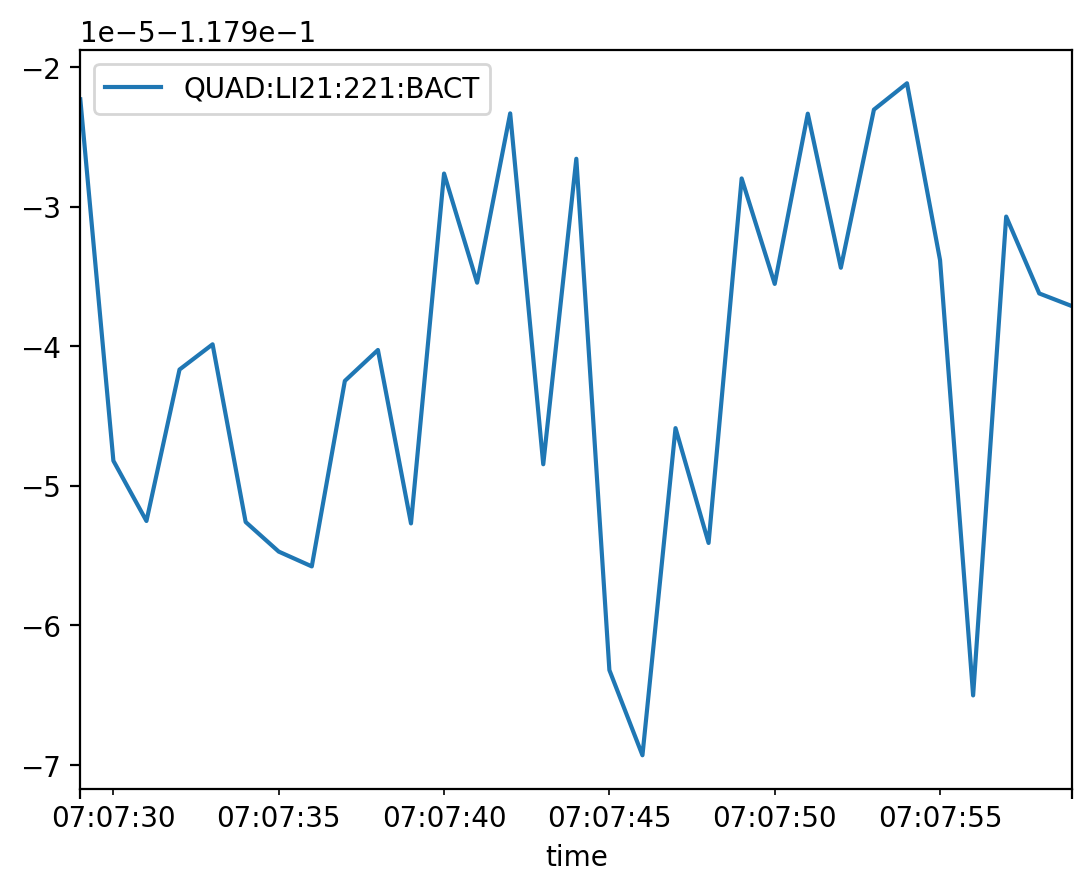

In [10]:
# Try another PV. This one was smoothy scanned
df1 = lcls_archiver_history_dataframe( 'QUAD:LI21:221:BACT', start=t_start, end=t_end)
df1.plot()

<AxesSubplot:xlabel='time'>

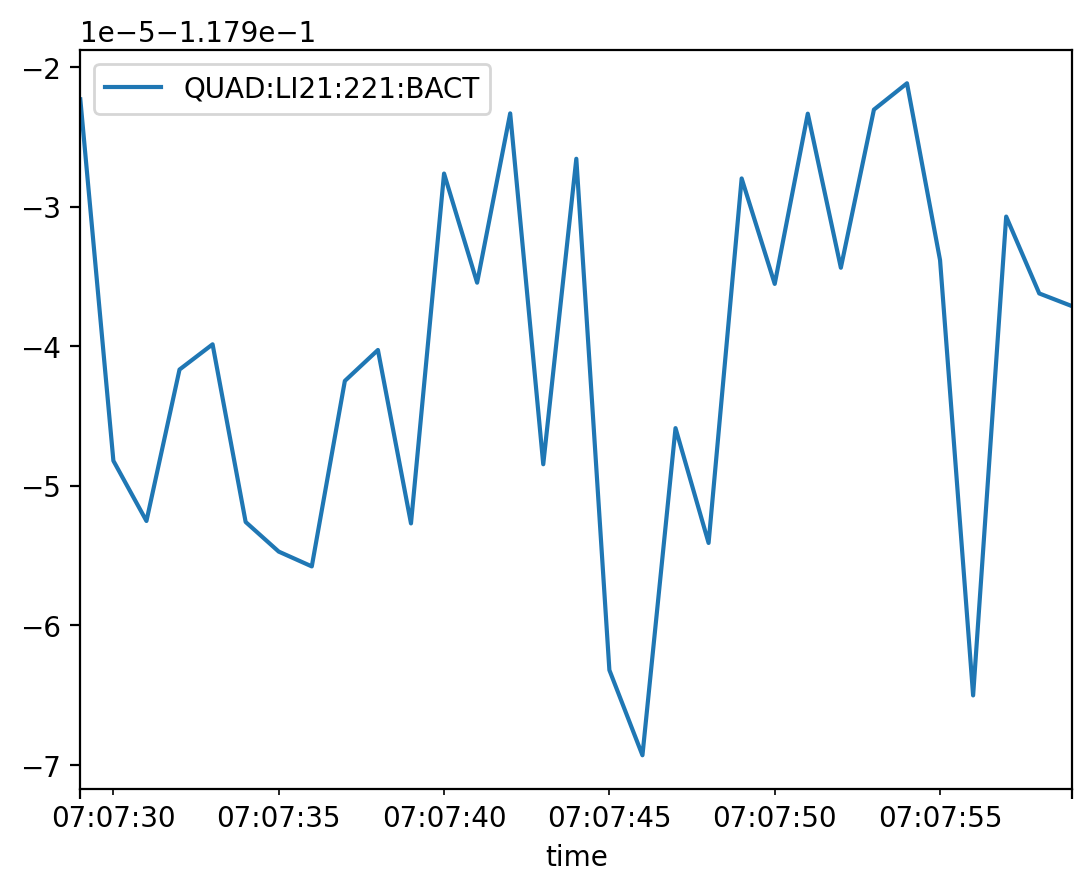

In [11]:
df1.plot()

Text(0, 0.5, 'Counts')

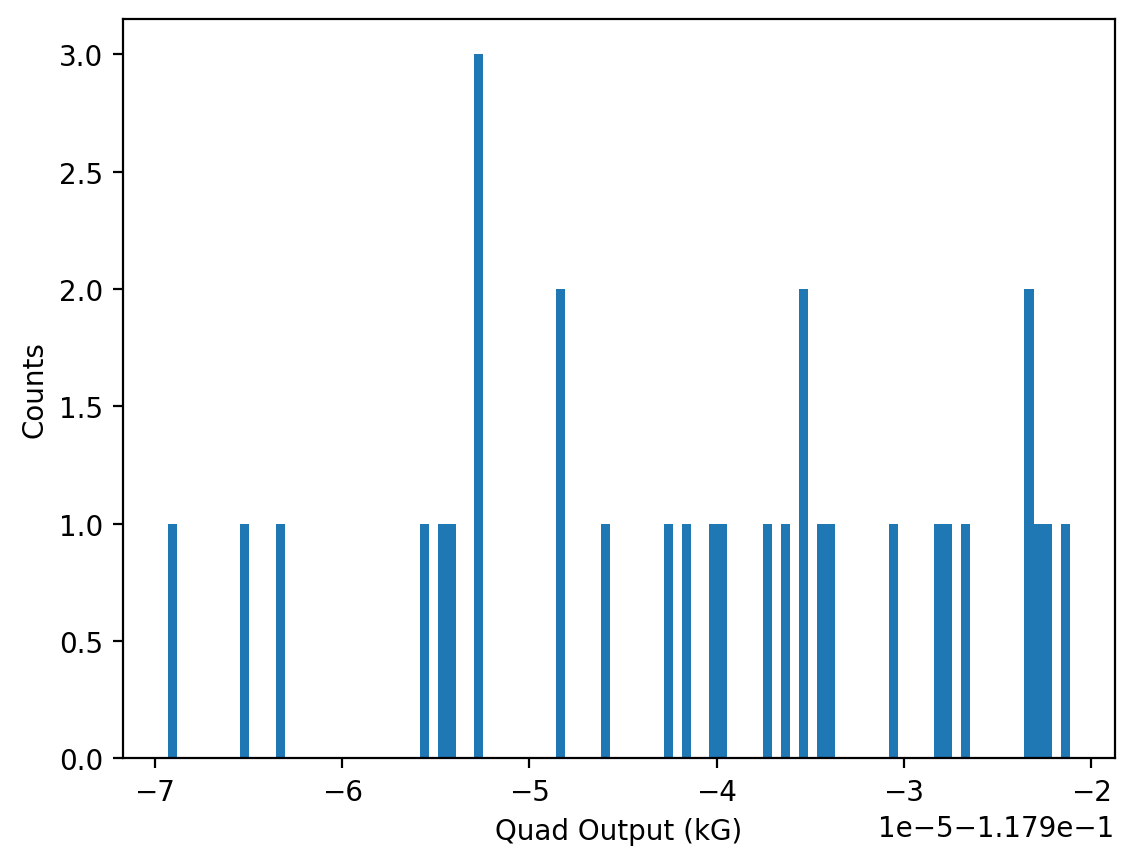

In [12]:
plt.hist(df1["QUAD:LI21:221:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI21:251:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

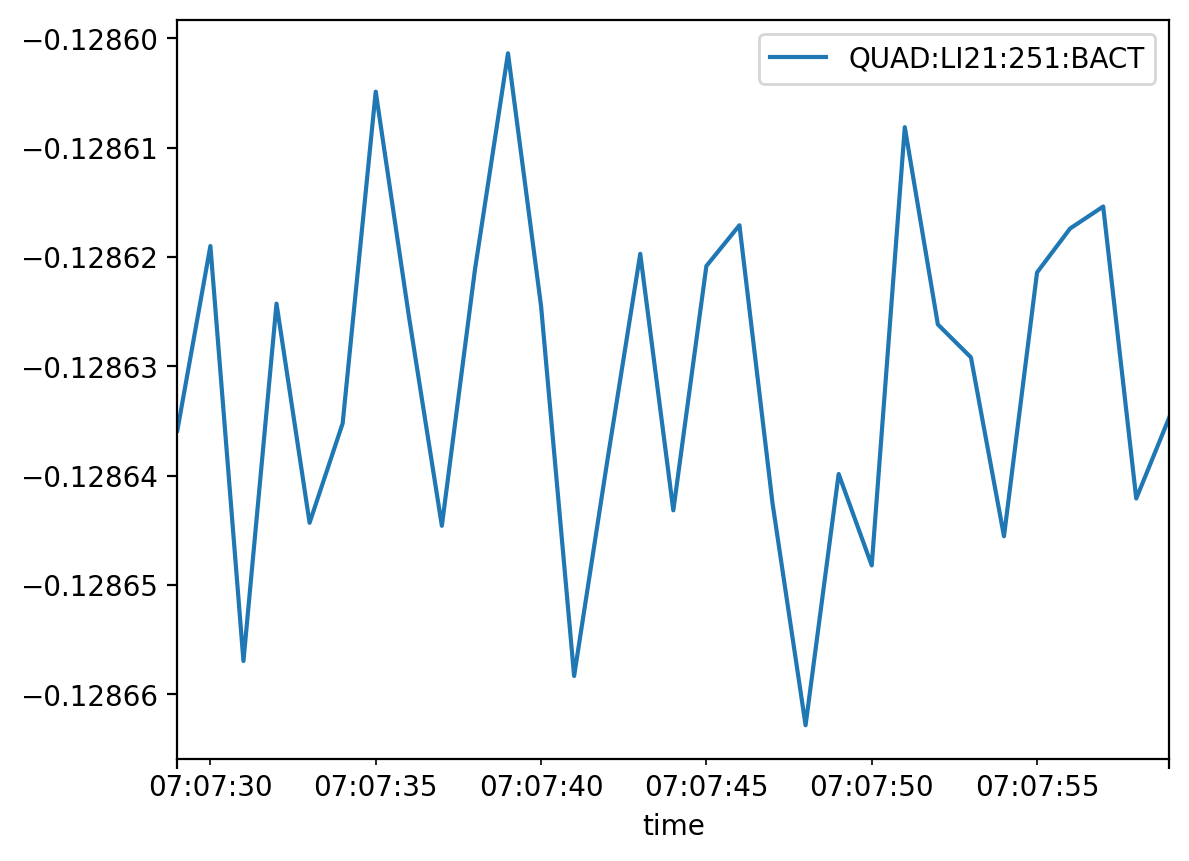

In [13]:
df2 = lcls_archiver_history_dataframe( 'QUAD:LI21:251:BACT', start=t_start, end=t_end)
df2.plot()

Text(0, 0.5, 'Counts')

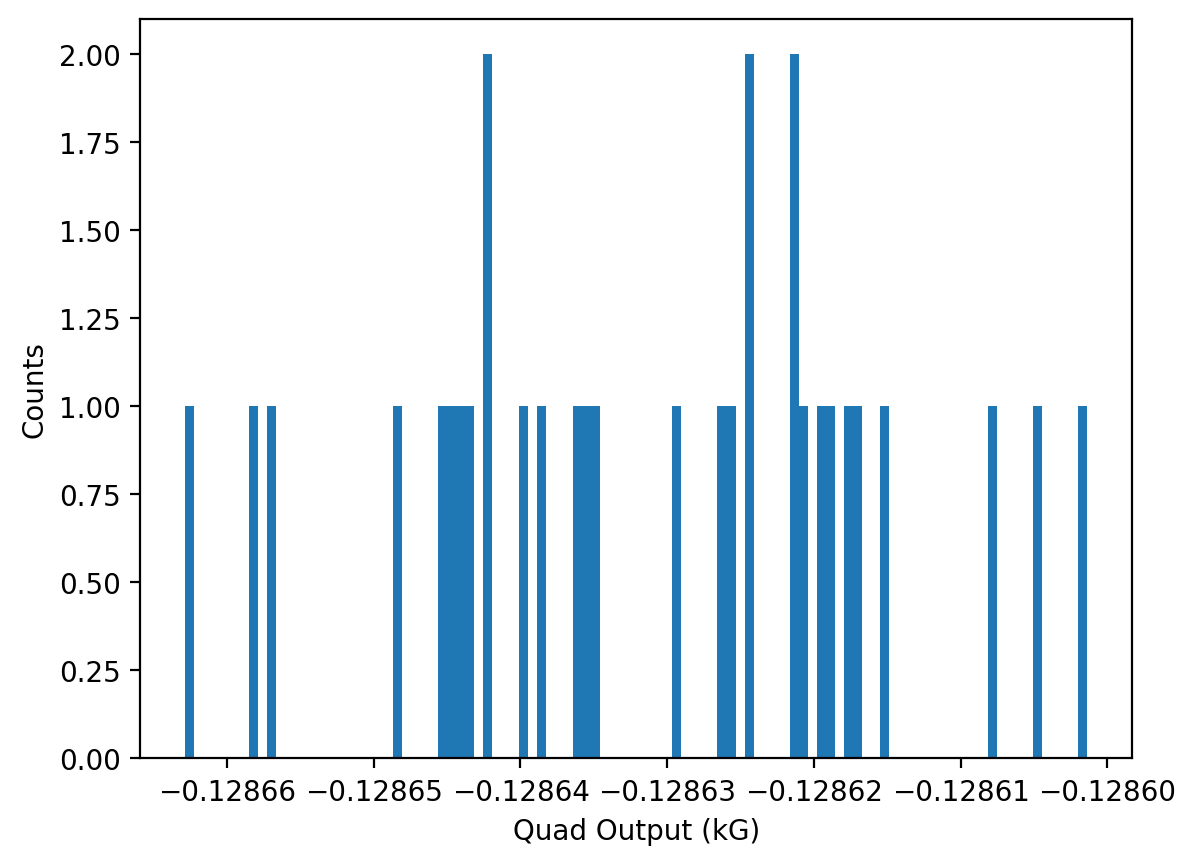

In [14]:
plt.hist(df2["QUAD:LI21:251:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI24:860:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

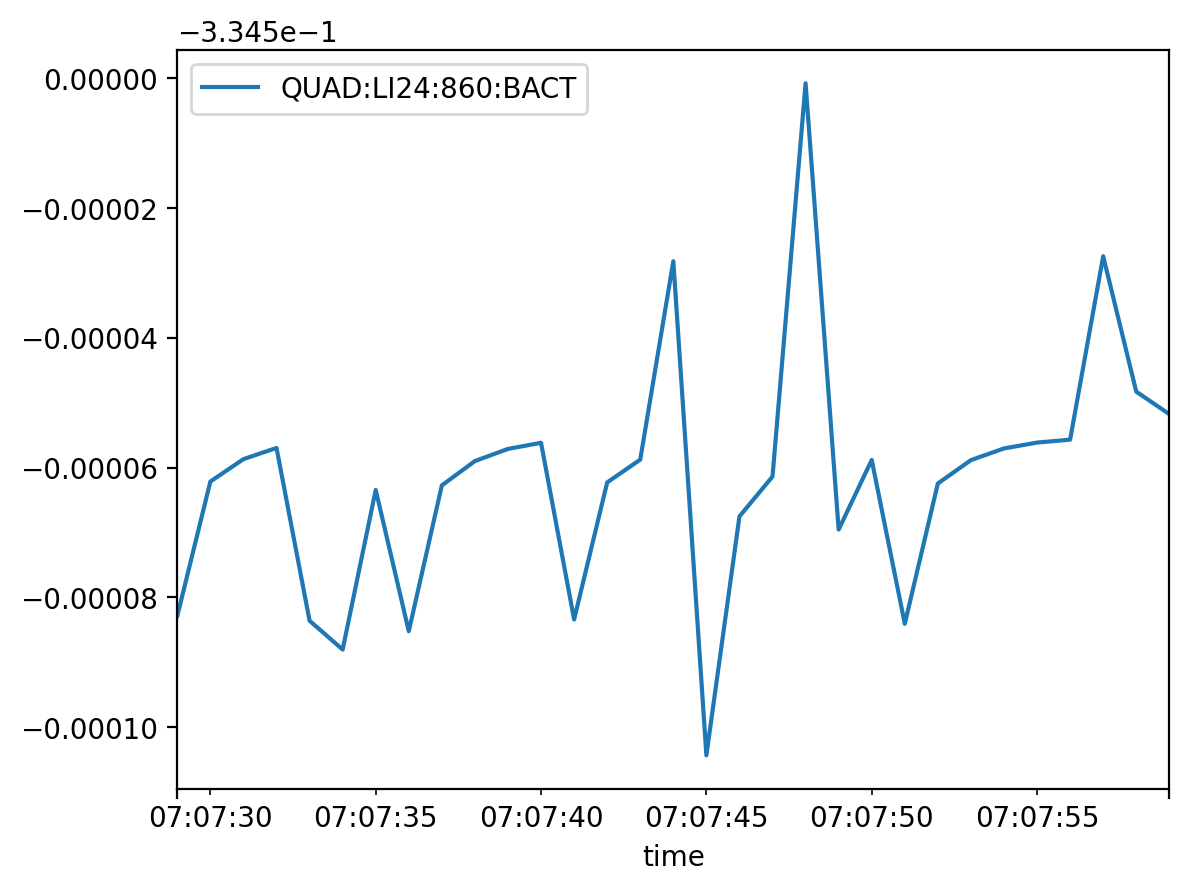

In [15]:
df3 = lcls_archiver_history_dataframe( 'QUAD:LI24:860:BACT', start=t_start, end=t_end)
df3.plot()

Text(0, 0.5, 'Counts')

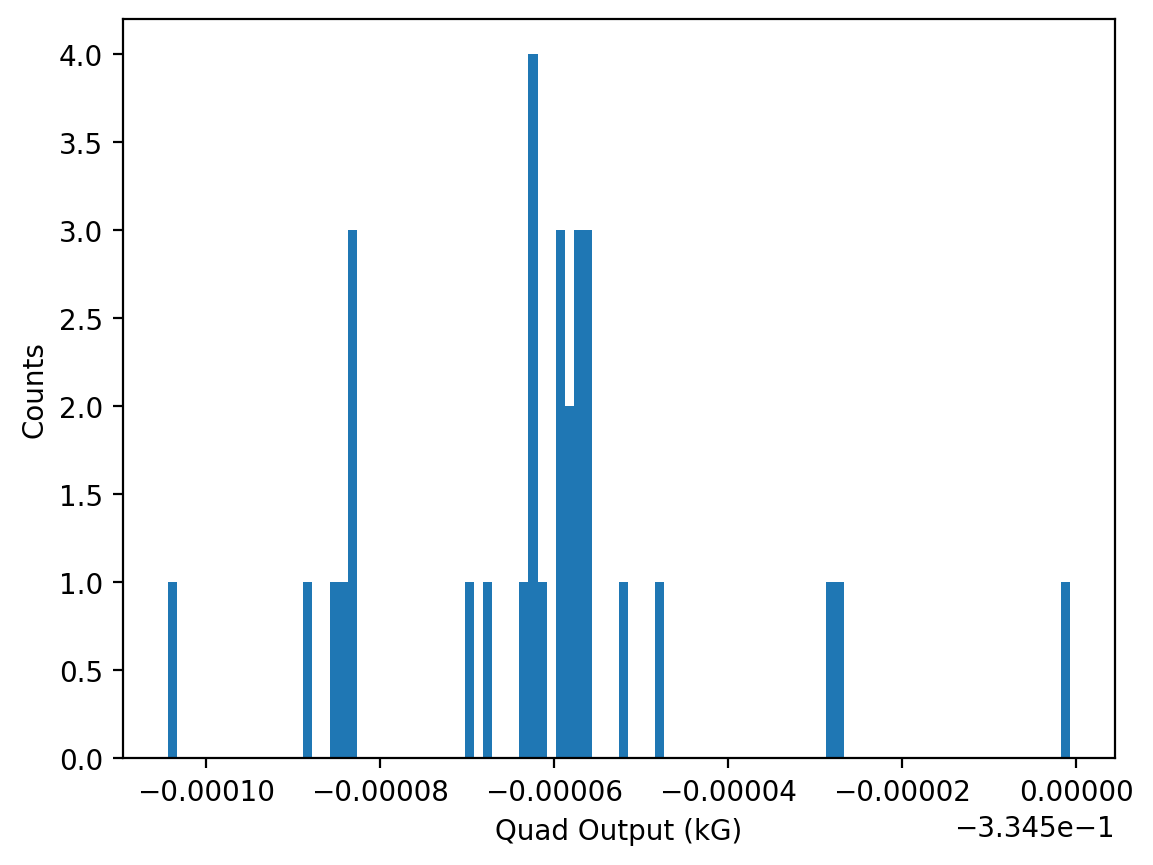

In [16]:
plt.hist(df3["QUAD:LI24:860:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI24:740:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

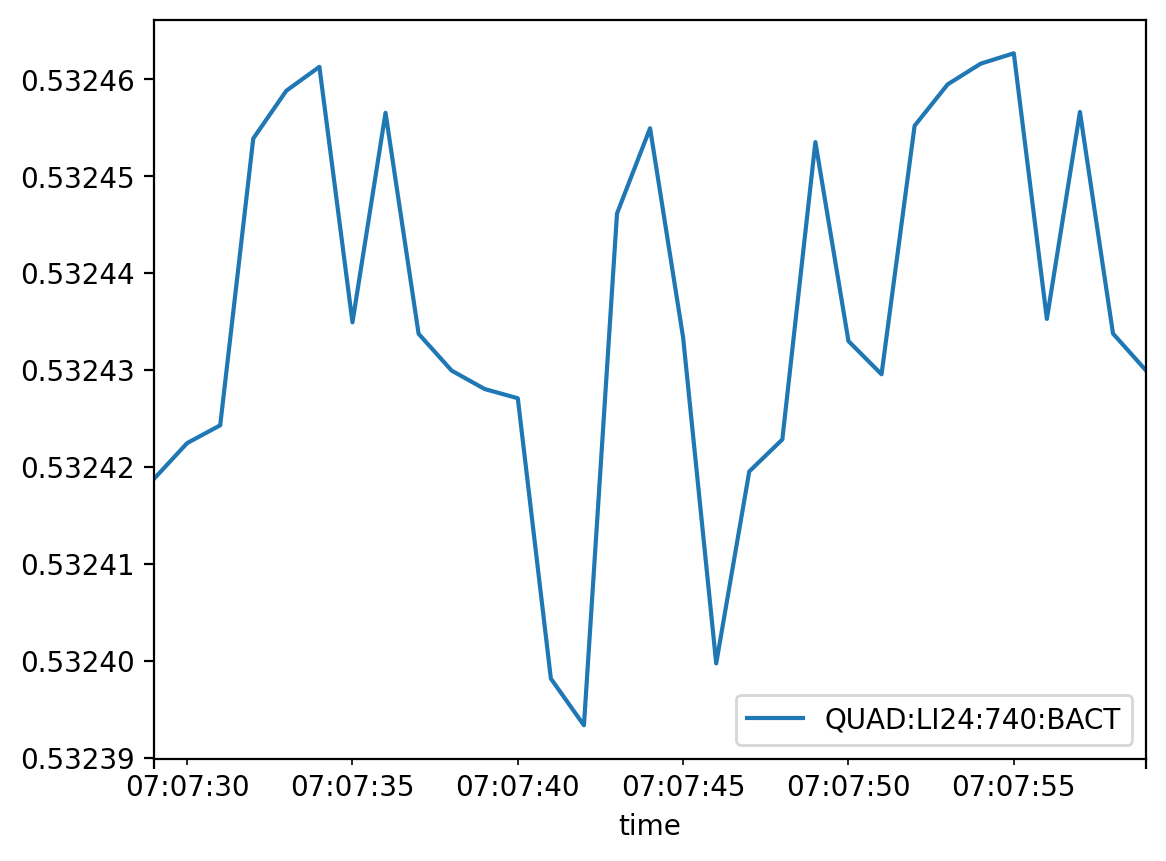

In [17]:
df4 = lcls_archiver_history_dataframe( 'QUAD:LI24:740:BACT', start=t_start, end=t_end)
df4.plot()

Text(0, 0.5, 'Counts')

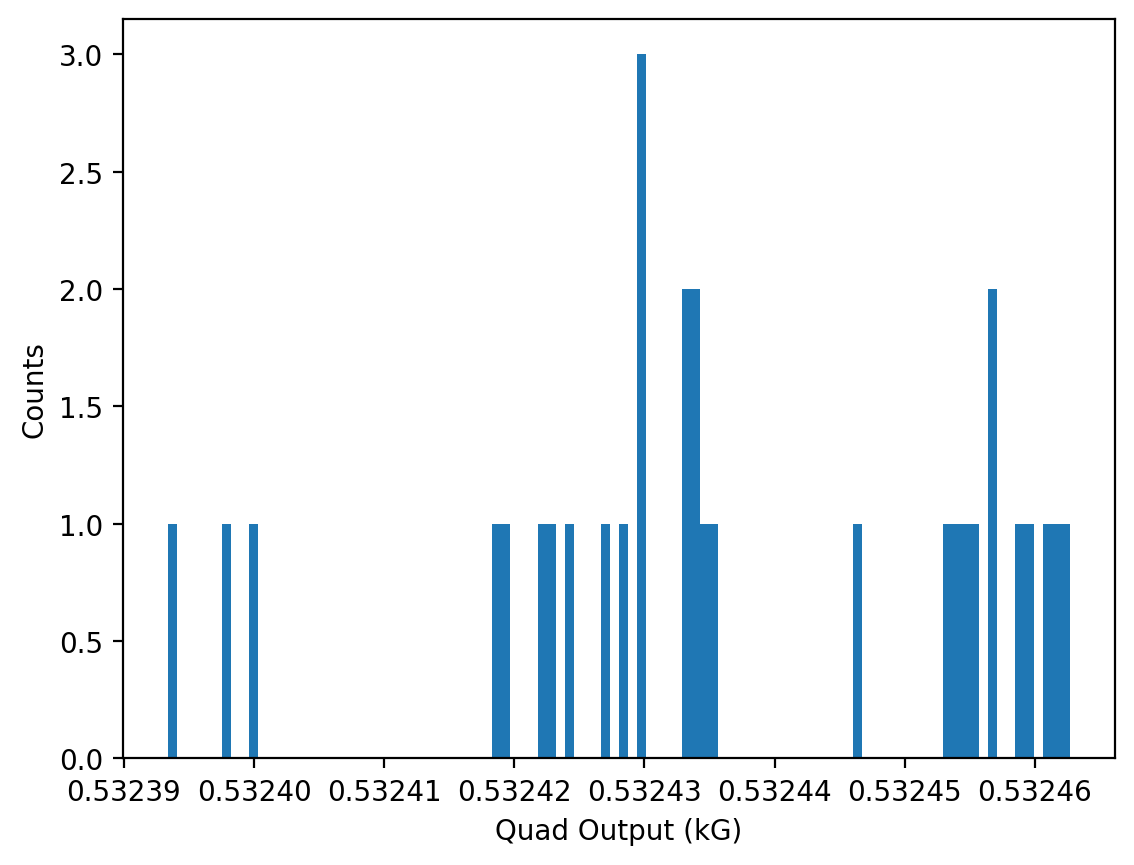

In [18]:
plt.hist(df4["QUAD:LI24:740:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:601:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

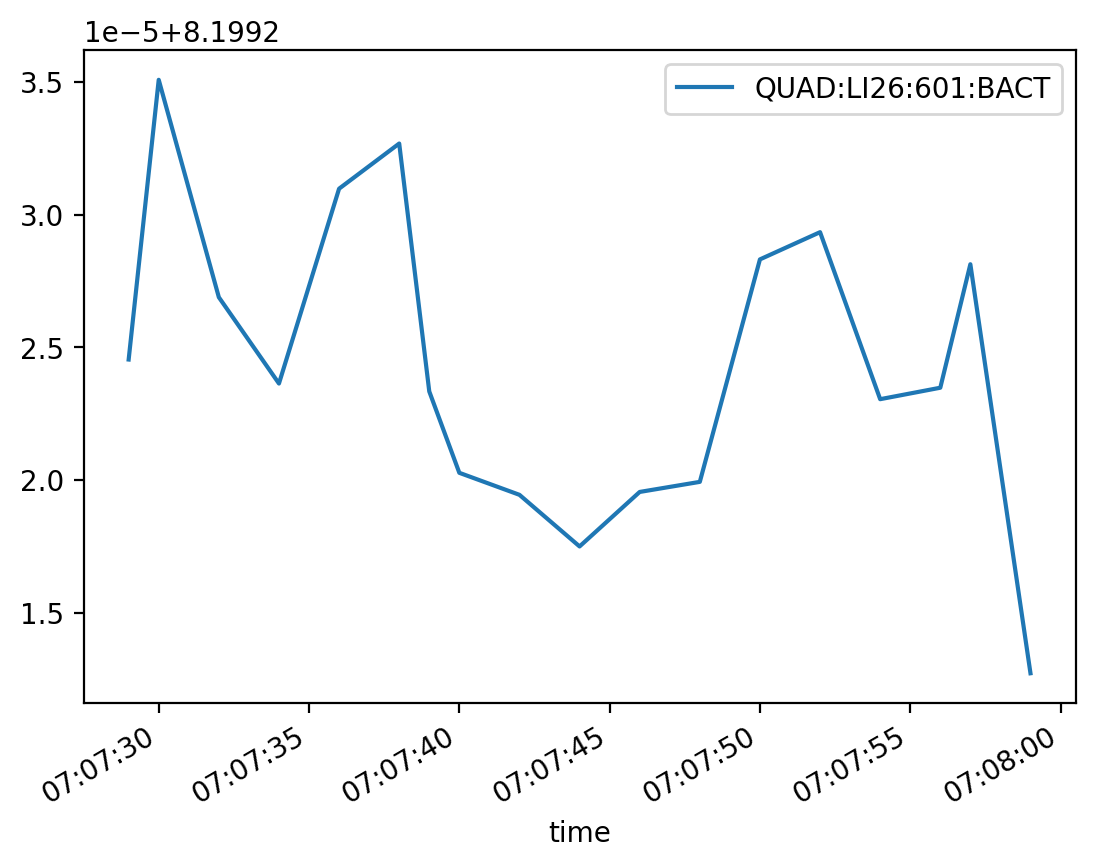

In [19]:
df5 = lcls_archiver_history_dataframe( 'QUAD:LI26:601:BACT', start=t_start, end=t_end)
df5.plot()

Text(0, 0.5, 'Counts')

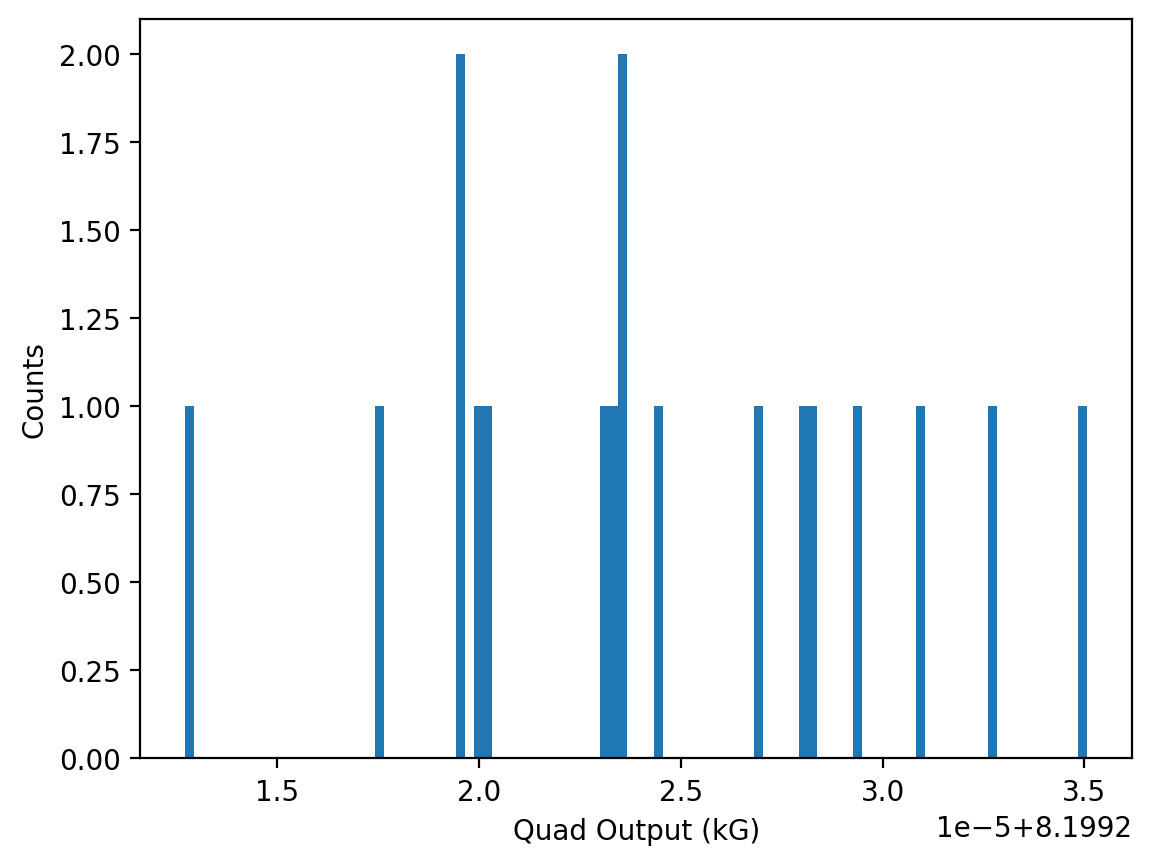

In [20]:
plt.hist(df5["QUAD:LI26:601:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:901:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

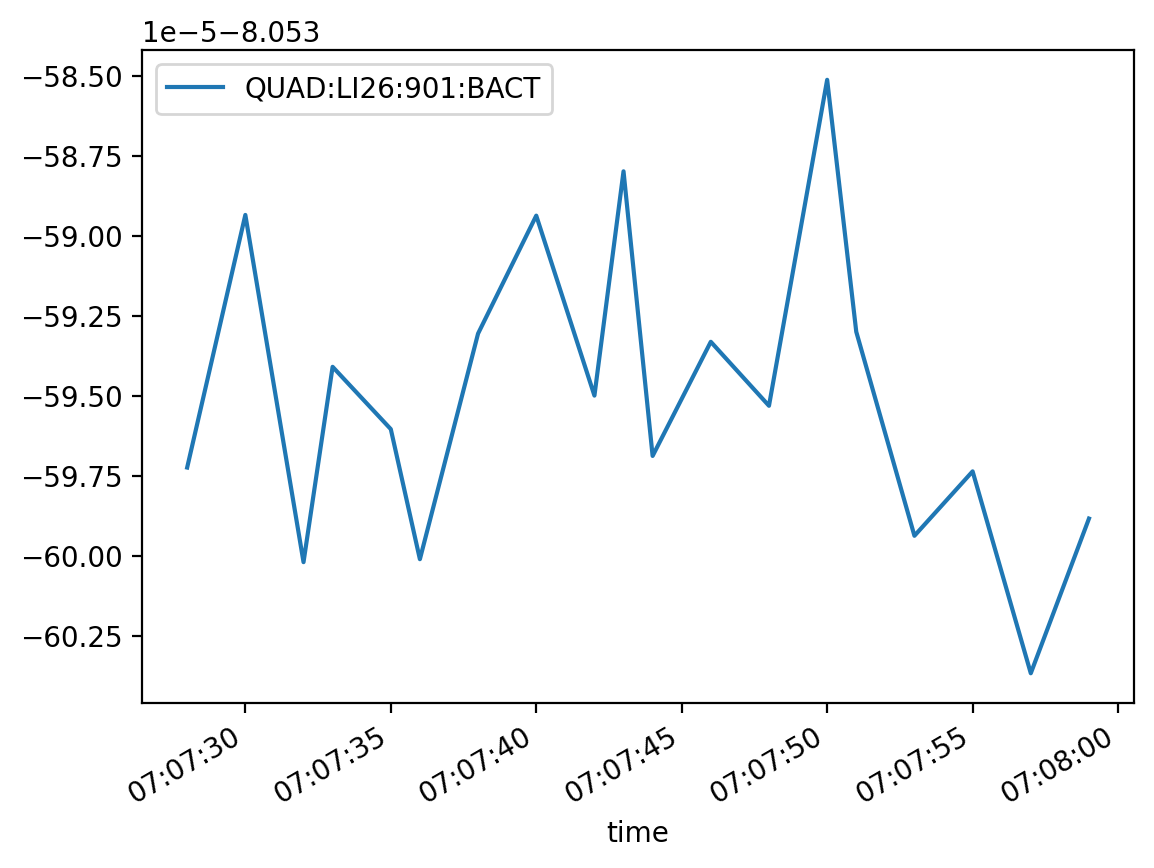

In [21]:
df6 = lcls_archiver_history_dataframe( 'QUAD:LI26:901:BACT', start=t_start, end=t_end)
df6.plot()

Text(0, 0.5, 'Counts')

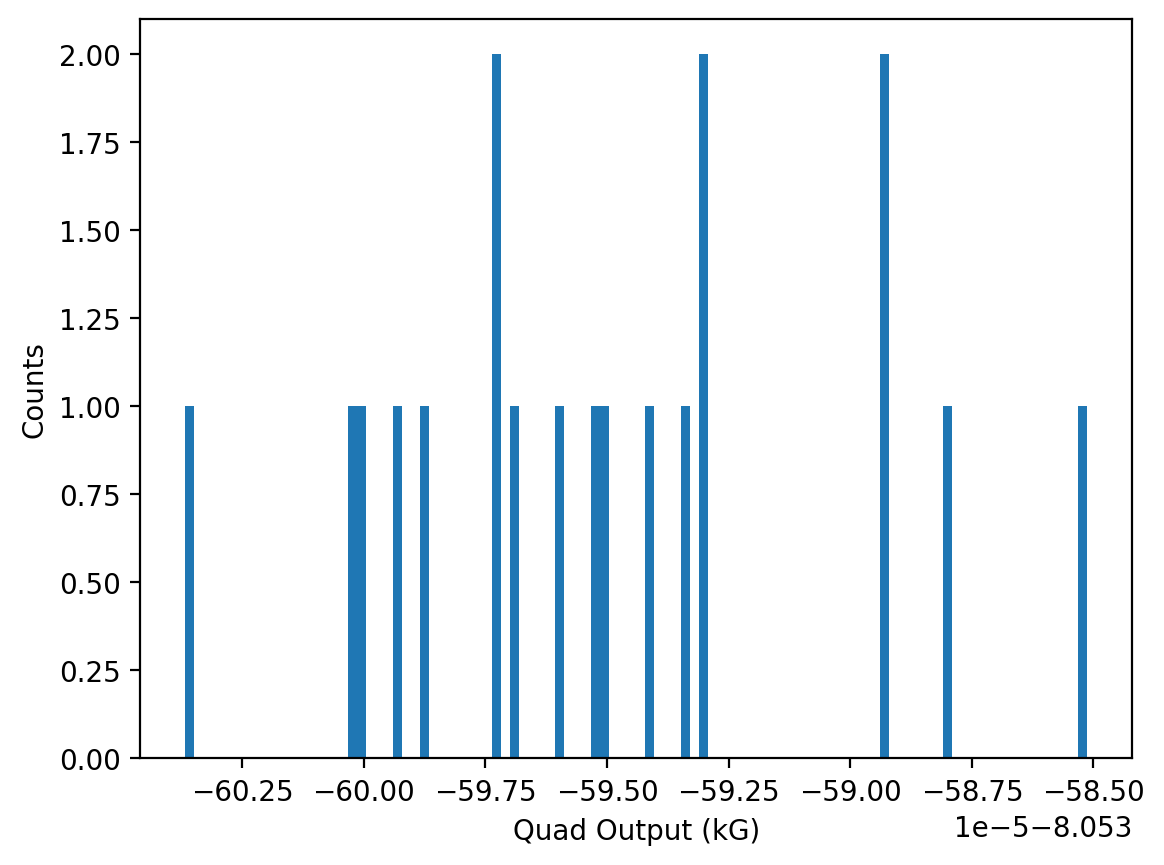

In [22]:
plt.hist(df6["QUAD:LI26:901:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:501:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

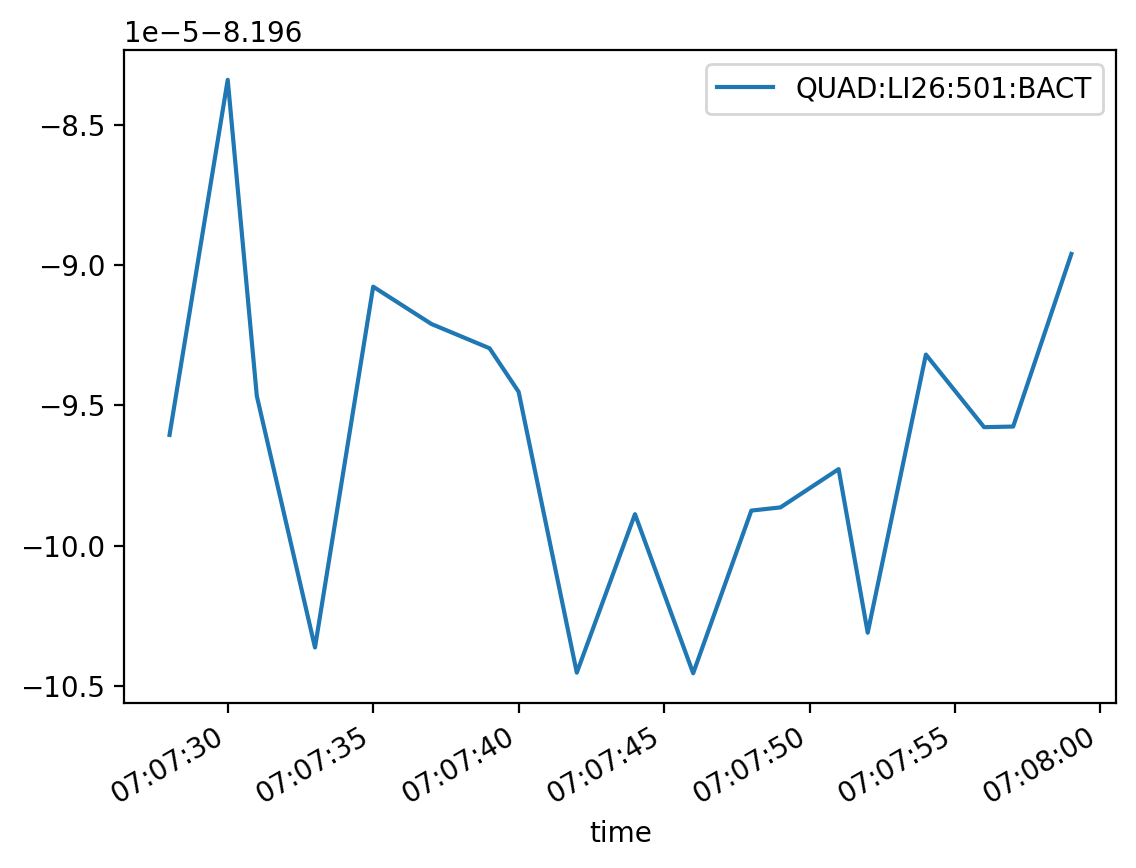

In [23]:
df7 = lcls_archiver_history_dataframe( 'QUAD:LI26:501:BACT', start=t_start, end=t_end)
df7.plot()

Text(0, 0.5, 'Counts')

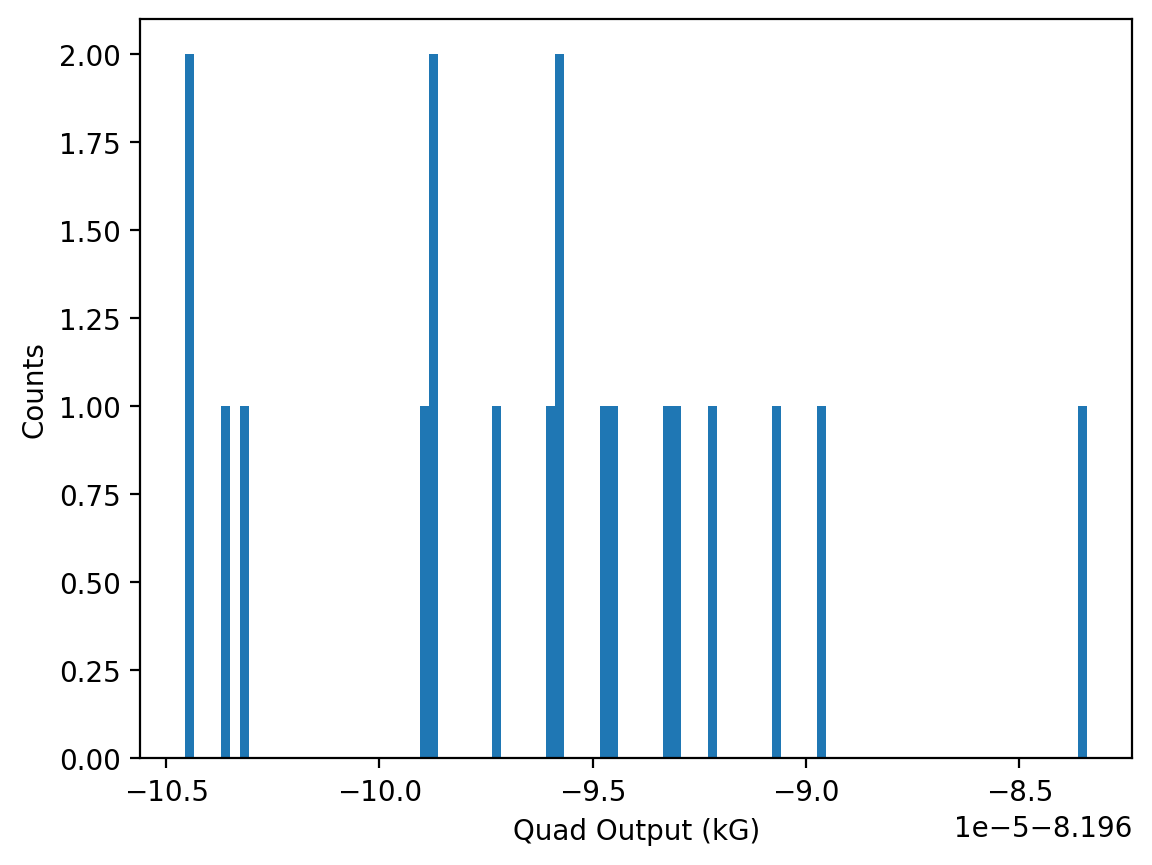

In [24]:
plt.hist(df7["QUAD:LI26:501:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:401:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

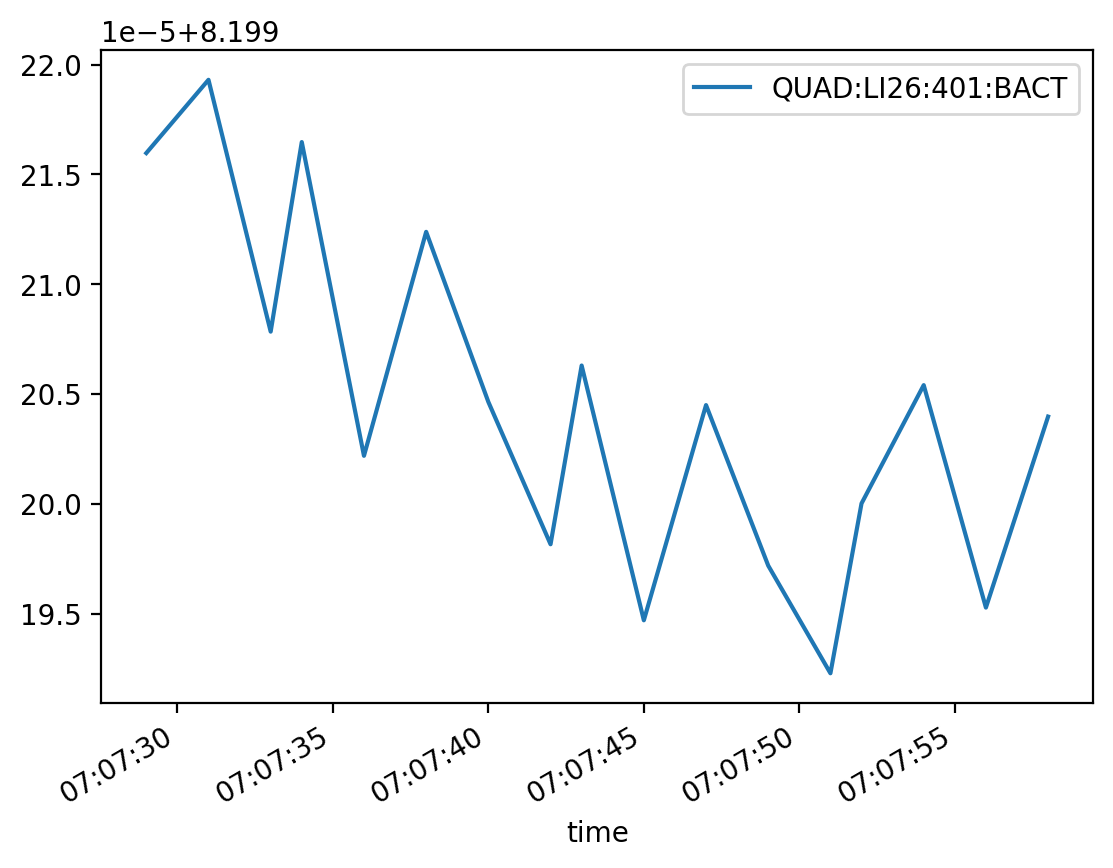

In [25]:
df8 = lcls_archiver_history_dataframe( 'QUAD:LI26:401:BACT', start=t_start, end=t_end)
df8.plot()

Text(0, 0.5, 'Counts')

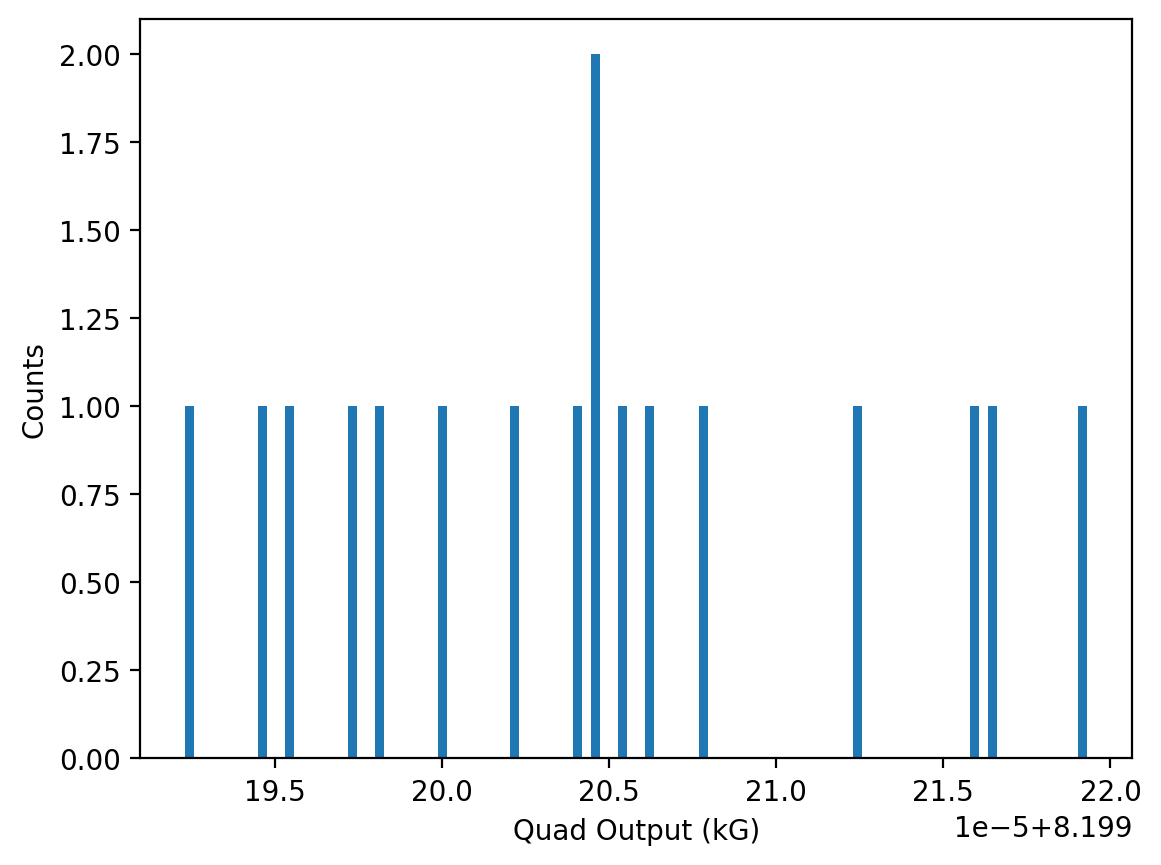

In [26]:
plt.hist(df8["QUAD:LI26:401:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:701:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

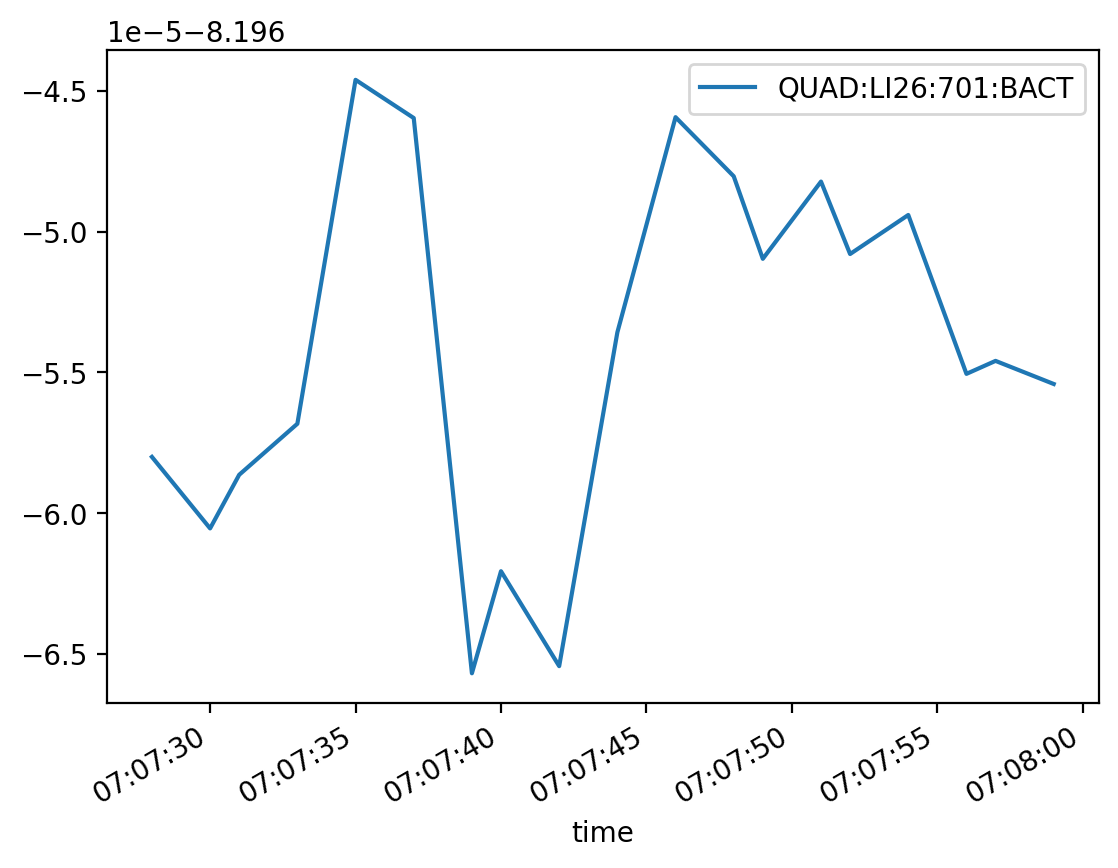

In [27]:
df9 = lcls_archiver_history_dataframe( 'QUAD:LI26:701:BACT', start=t_start, end=t_end)
df9.plot()

Text(0, 0.5, 'Counts')

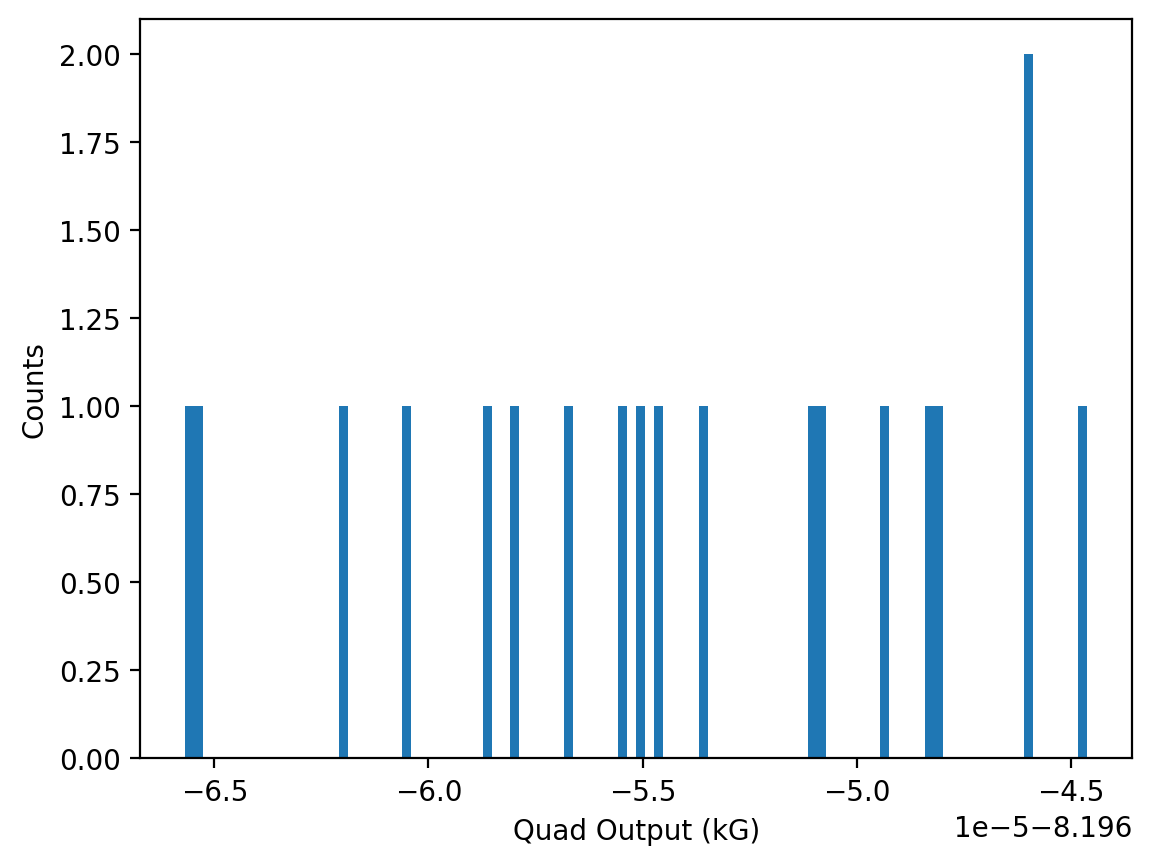

In [28]:
plt.hist(df9["QUAD:LI26:701:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:201:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

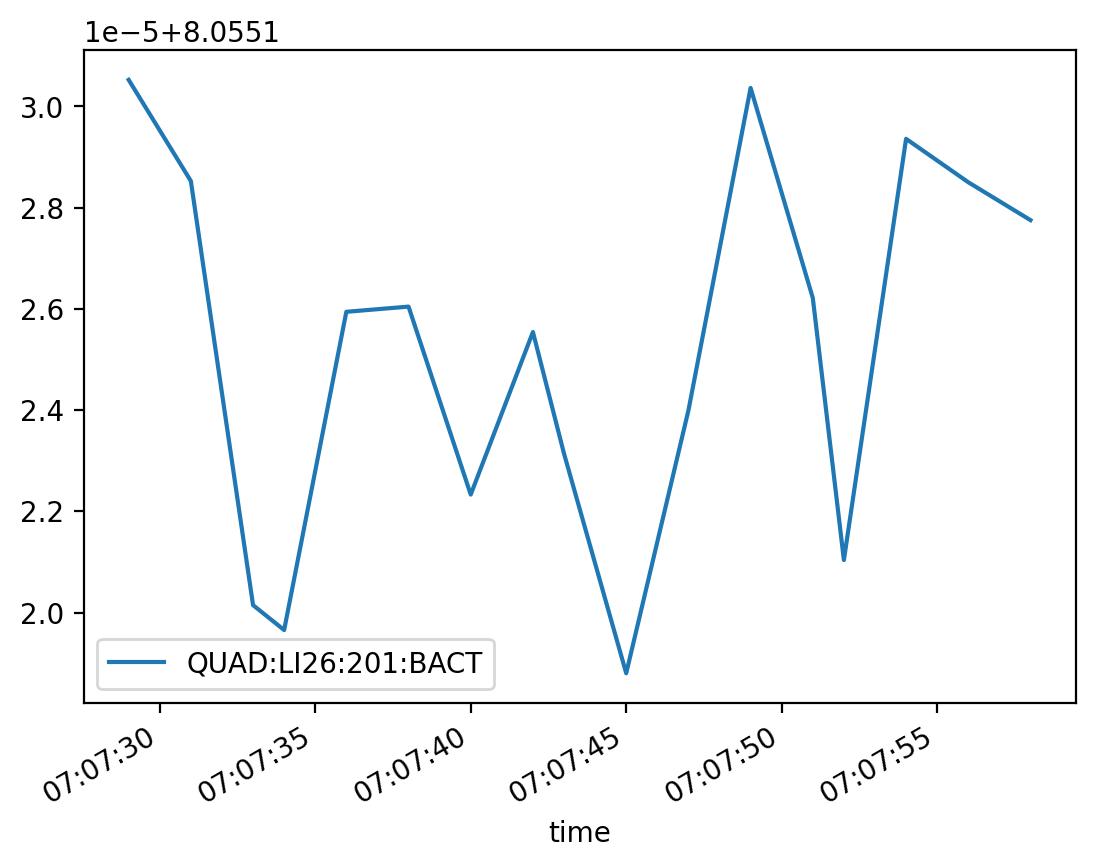

In [29]:
df10 = lcls_archiver_history_dataframe( 'QUAD:LI26:201:BACT', start=t_start, end=t_end)
df10.plot()

Text(0, 0.5, 'Counts')

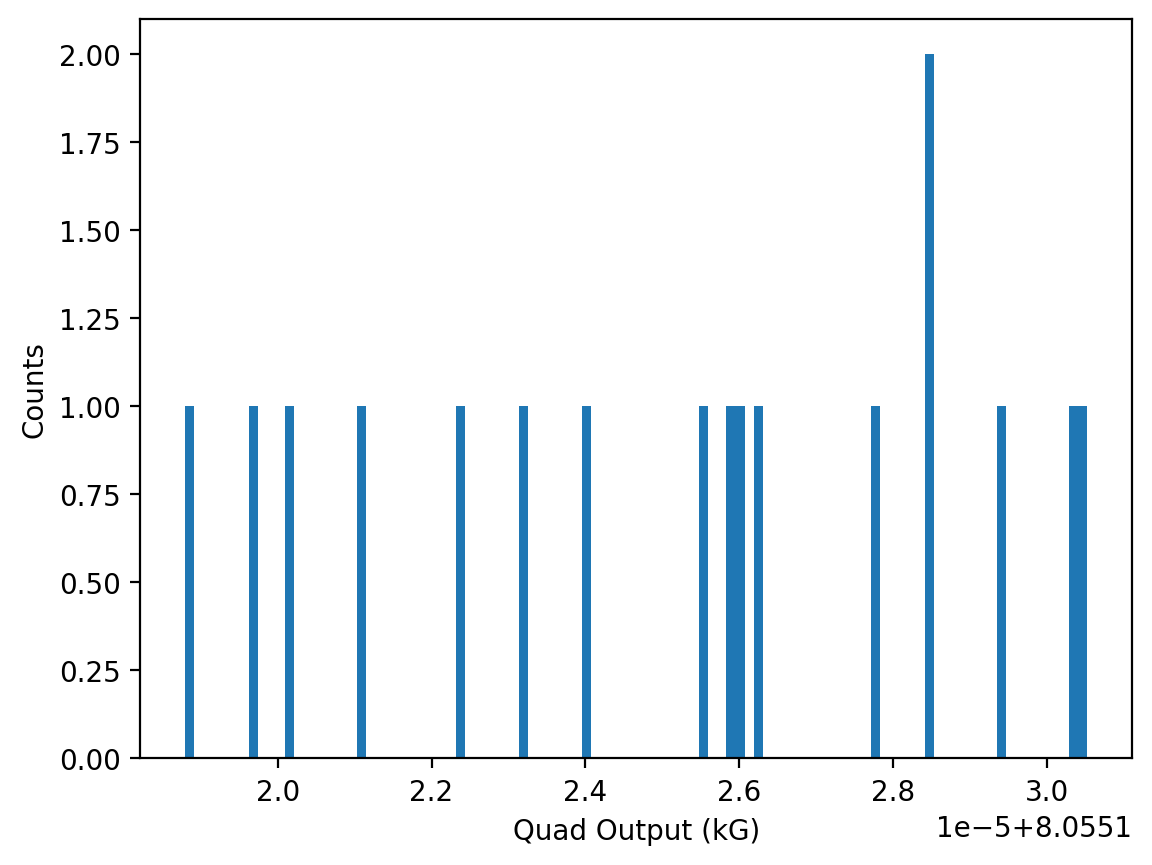

In [30]:
plt.hist(df10["QUAD:LI26:201:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:660:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

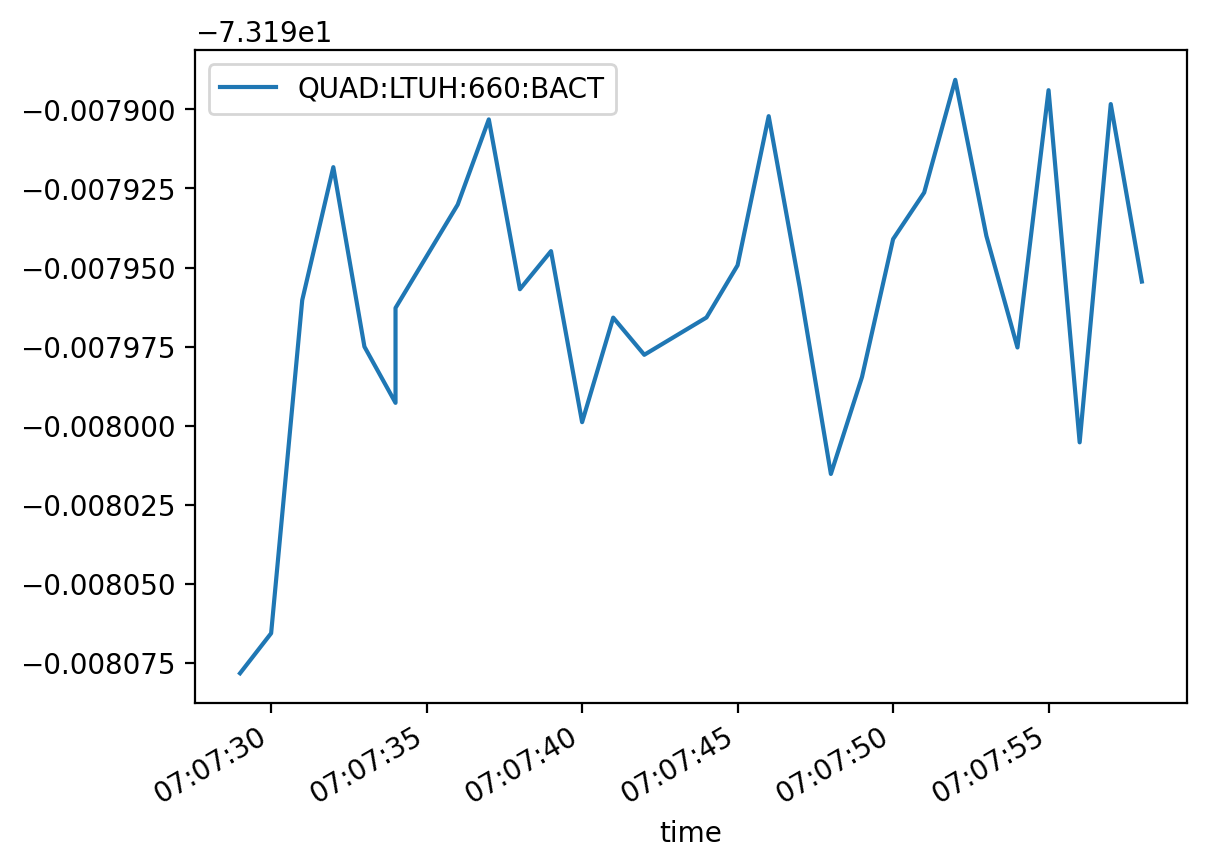

In [31]:
df11 = lcls_archiver_history_dataframe( 'QUAD:LTUH:660:BACT', start=t_start, end=t_end)
df11.plot()

Text(0, 0.5, 'Counts')

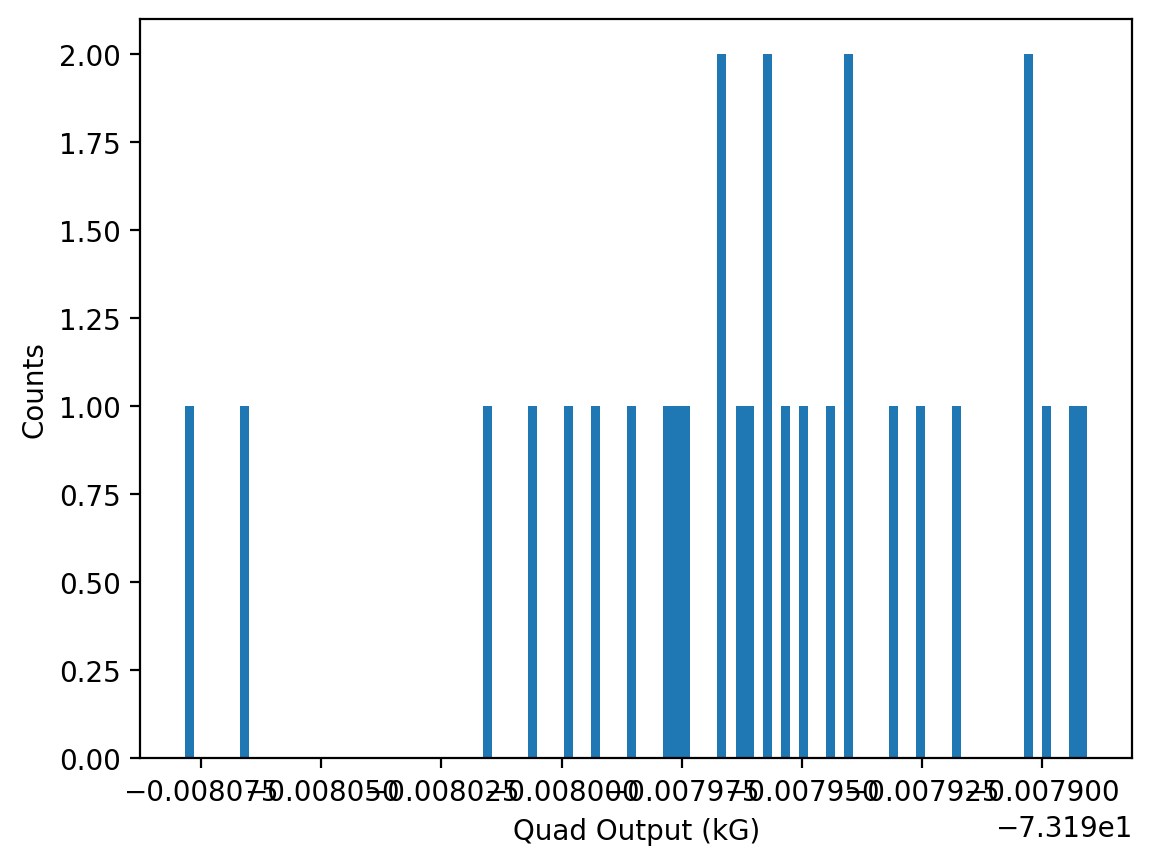

In [32]:
plt.hist(df11["QUAD:LTUH:660:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:680:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

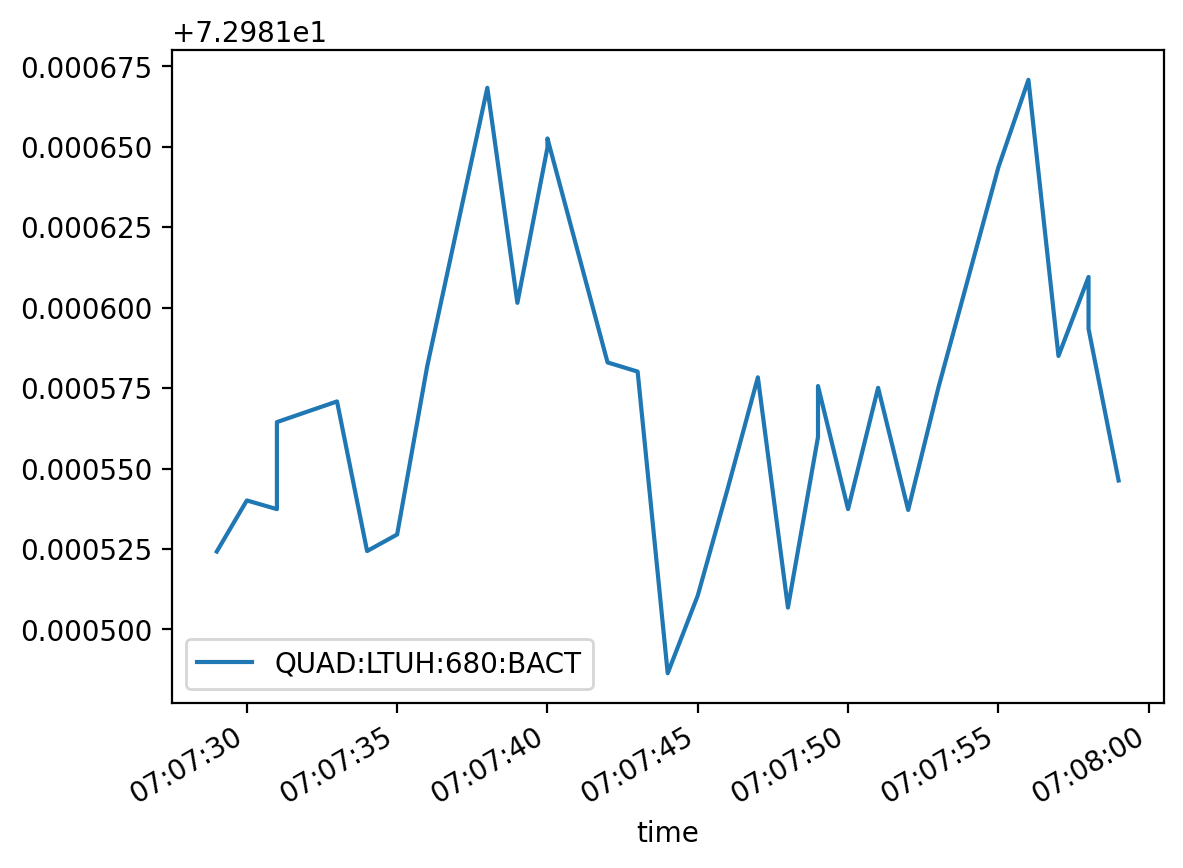

In [33]:
df12 = lcls_archiver_history_dataframe( 'QUAD:LTUH:680:BACT', start=t_start, end=t_end)
df12.plot()

Text(0, 0.5, 'Counts')

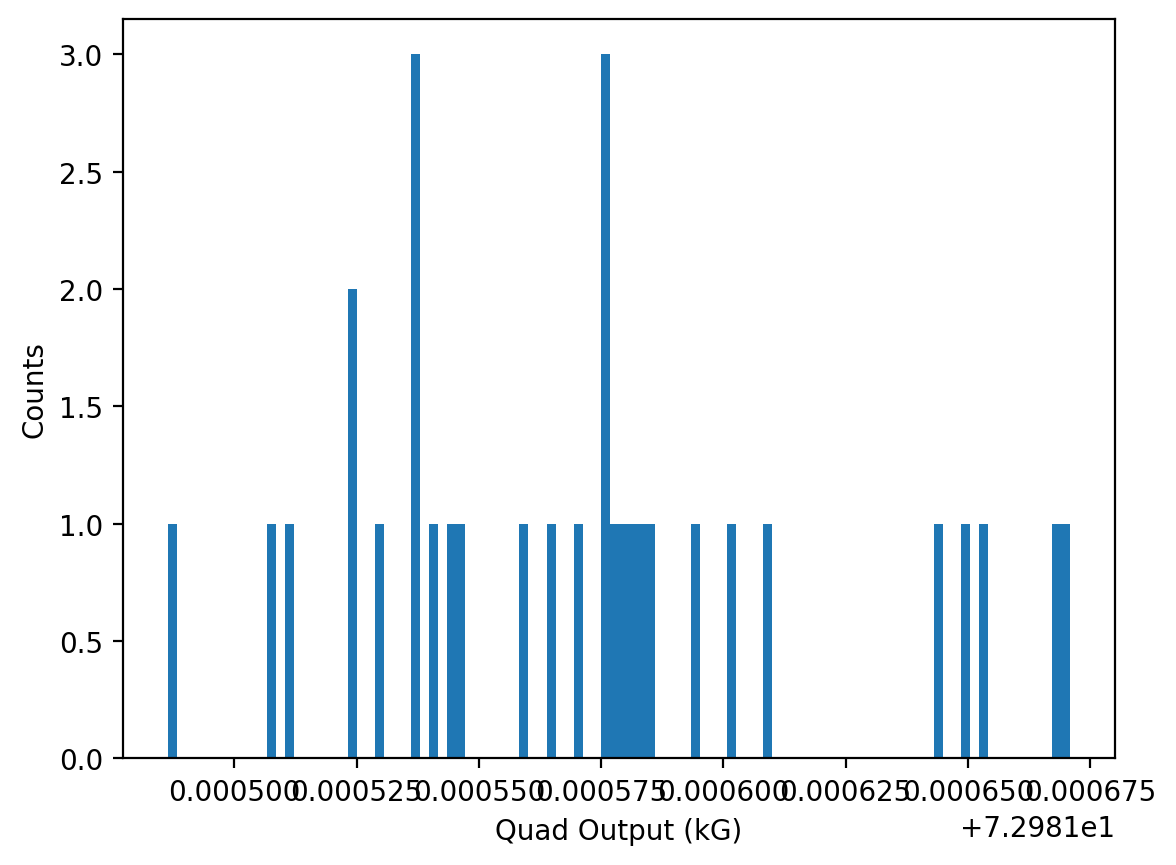

In [34]:
plt.hist(df12["QUAD:LTUH:680:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:640:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

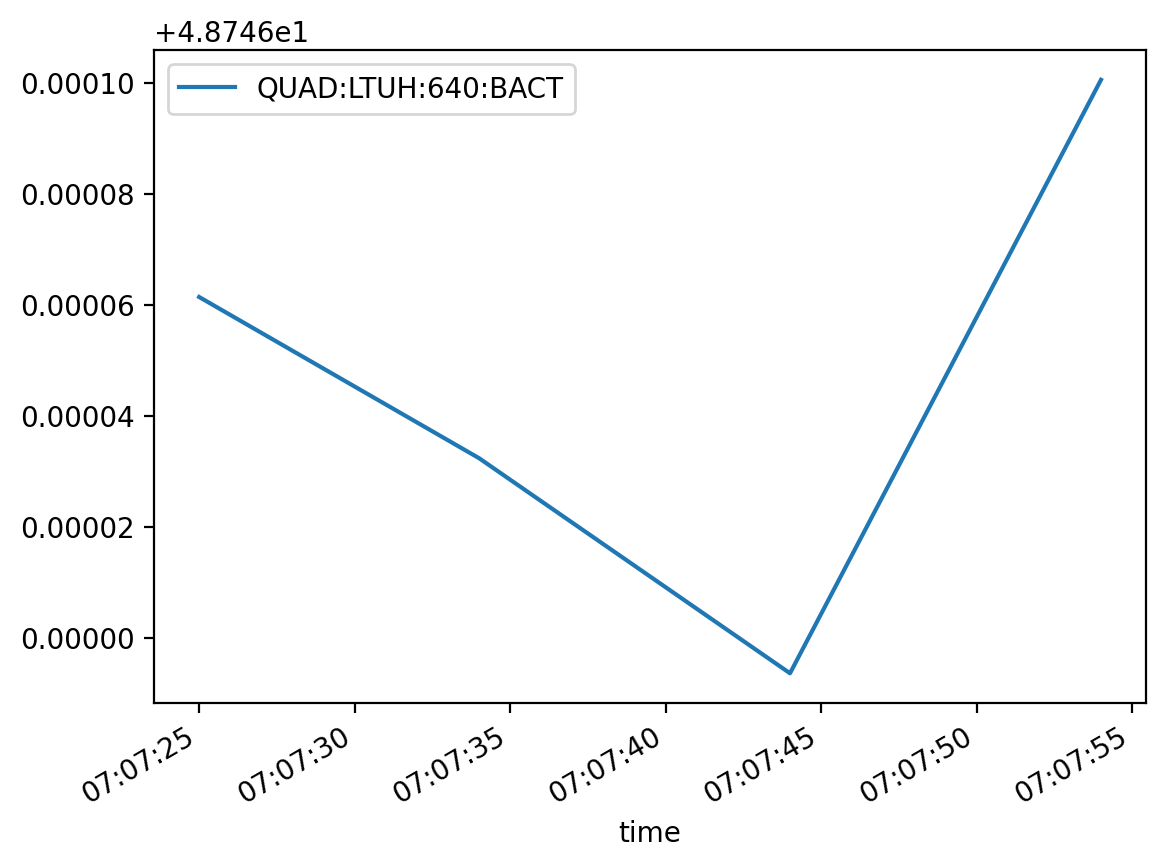

In [35]:
df13 = lcls_archiver_history_dataframe( 'QUAD:LTUH:640:BACT', start=t_start, end=t_end)
df13.plot()

Text(0, 0.5, 'Counts')

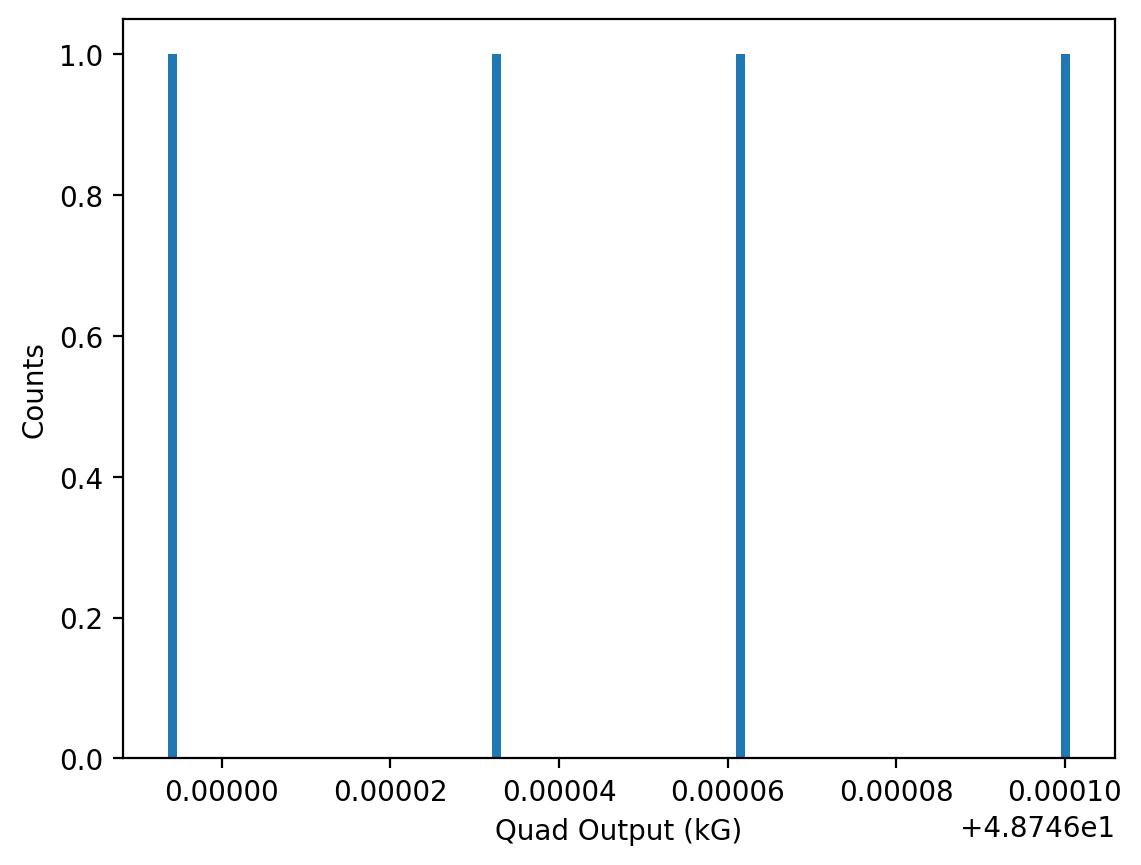

In [36]:
plt.hist(df13["QUAD:LTUH:640:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:460:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

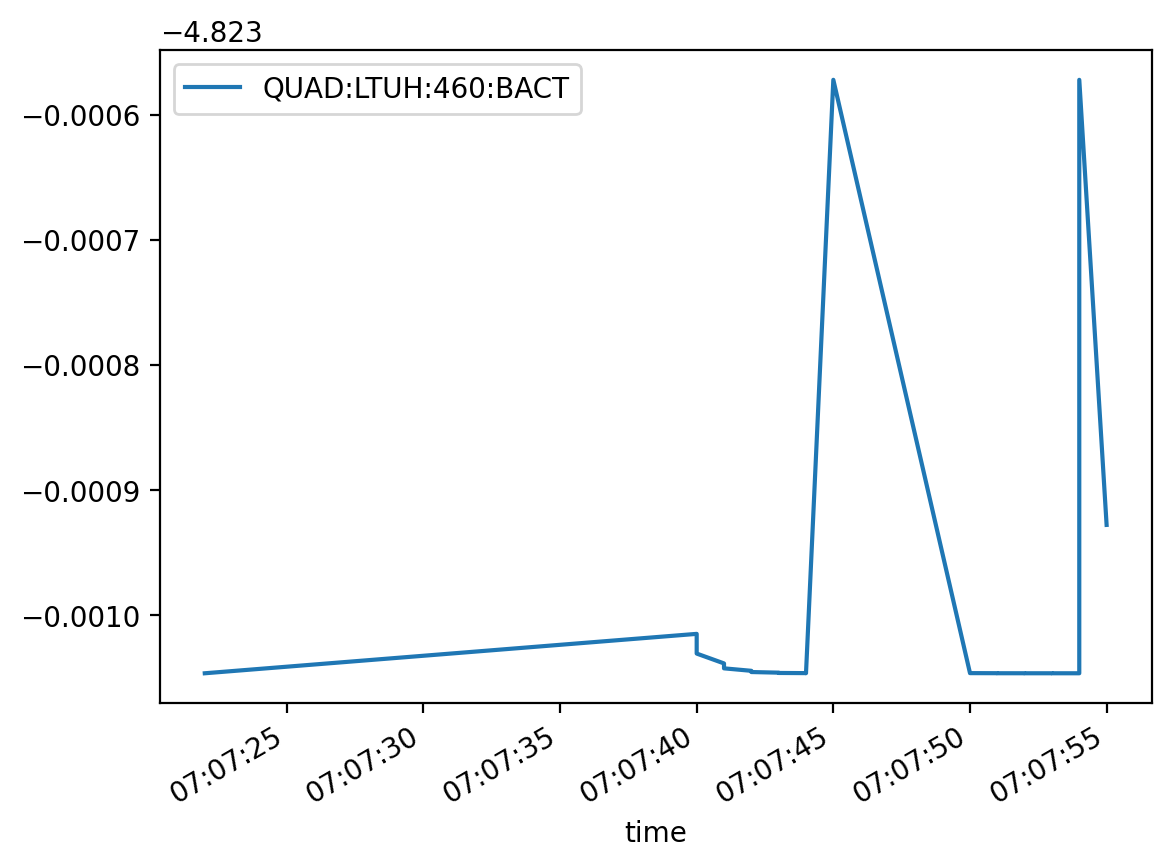

In [37]:
df14 = lcls_archiver_history_dataframe( 'QUAD:LTUH:460:BACT', start=t_start, end=t_end)
df14.plot()

Text(0, 0.5, 'Counts')

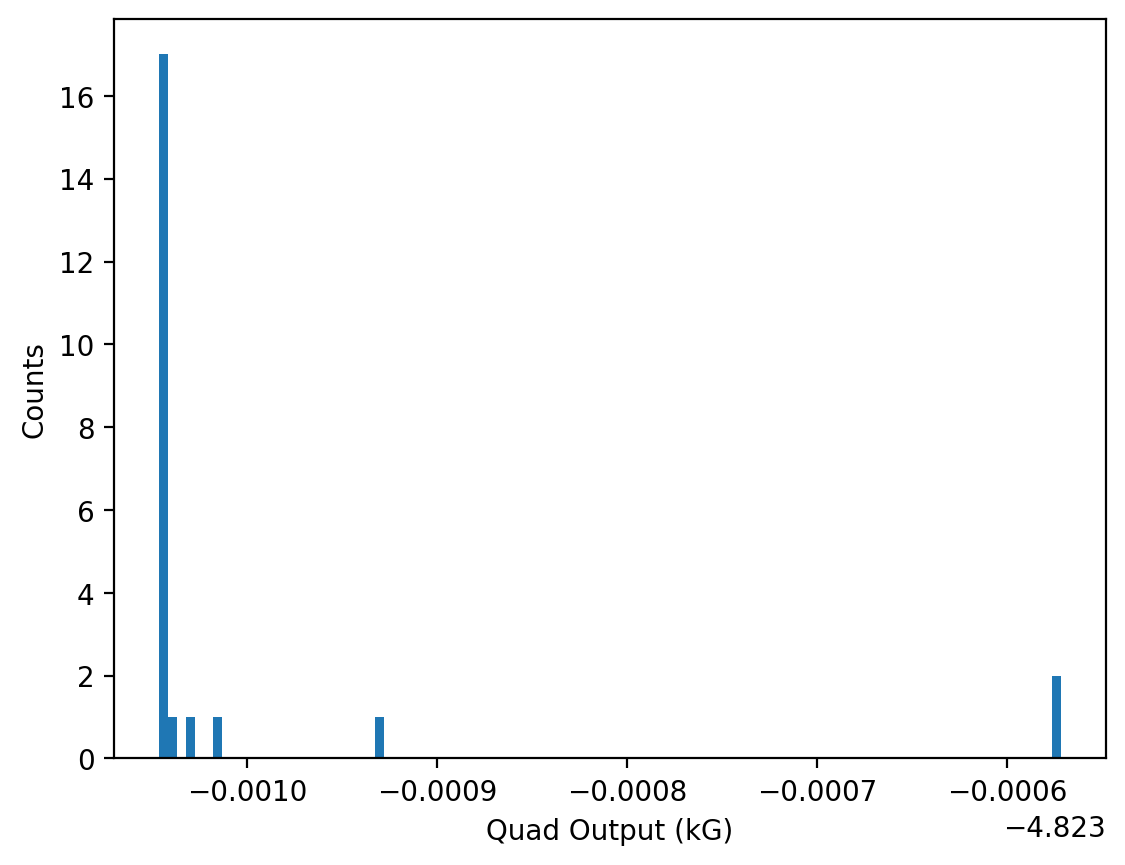

In [38]:
plt.hist(df14["QUAD:LTUH:460:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:440:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

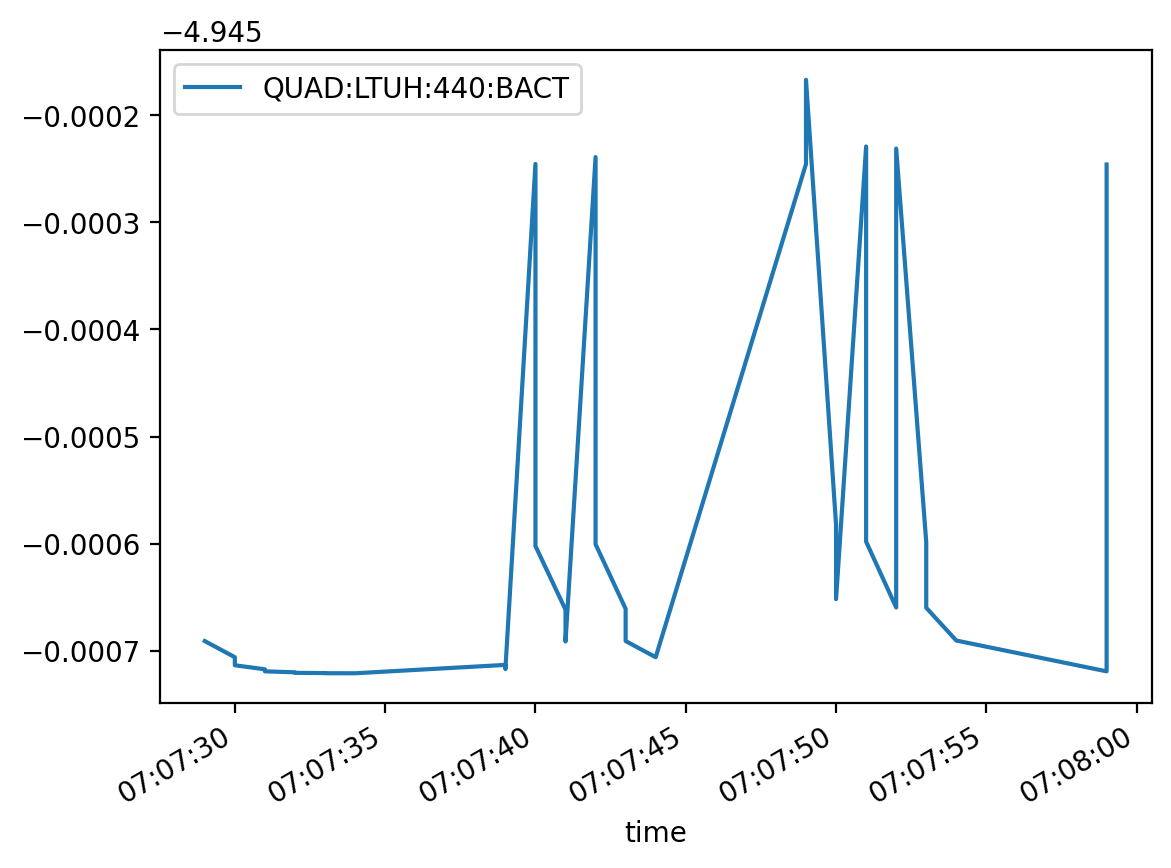

In [39]:
df15 = lcls_archiver_history_dataframe( 'QUAD:LTUH:440:BACT', start=t_start, end=t_end)
df15.plot()

Text(0, 0.5, 'Counts')

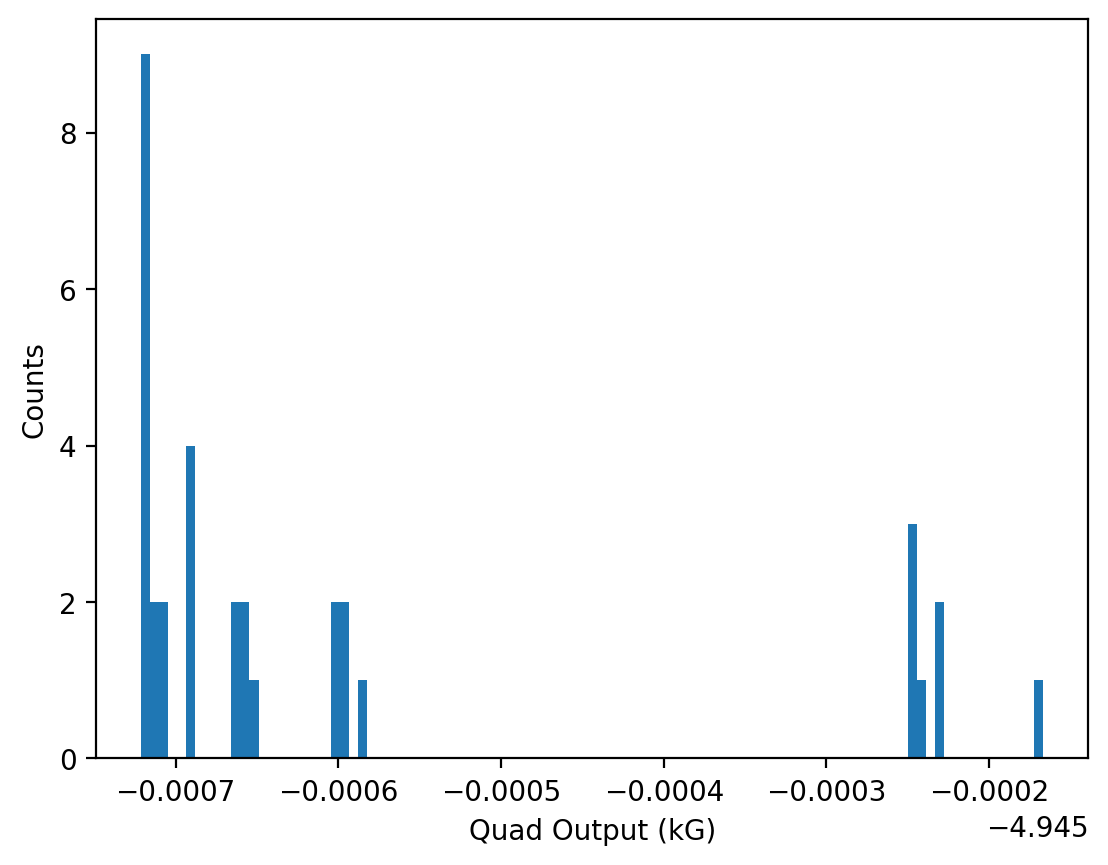

In [40]:
plt.hist(df15["QUAD:LTUH:440:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LTUH:620:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

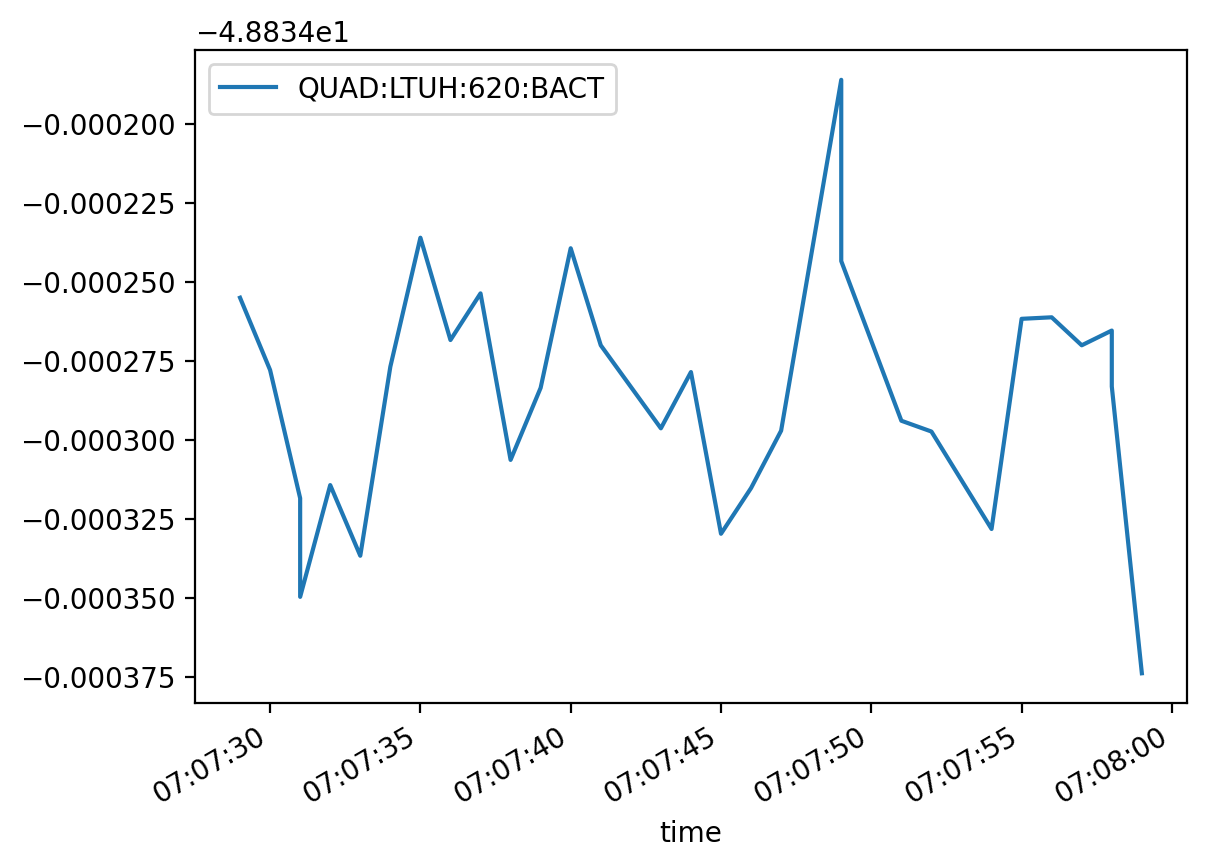

In [41]:
df16 = lcls_archiver_history_dataframe( 'QUAD:LTUH:620:BACT', start=t_start, end=t_end)
df16.plot()

Text(0, 0.5, 'Counts')

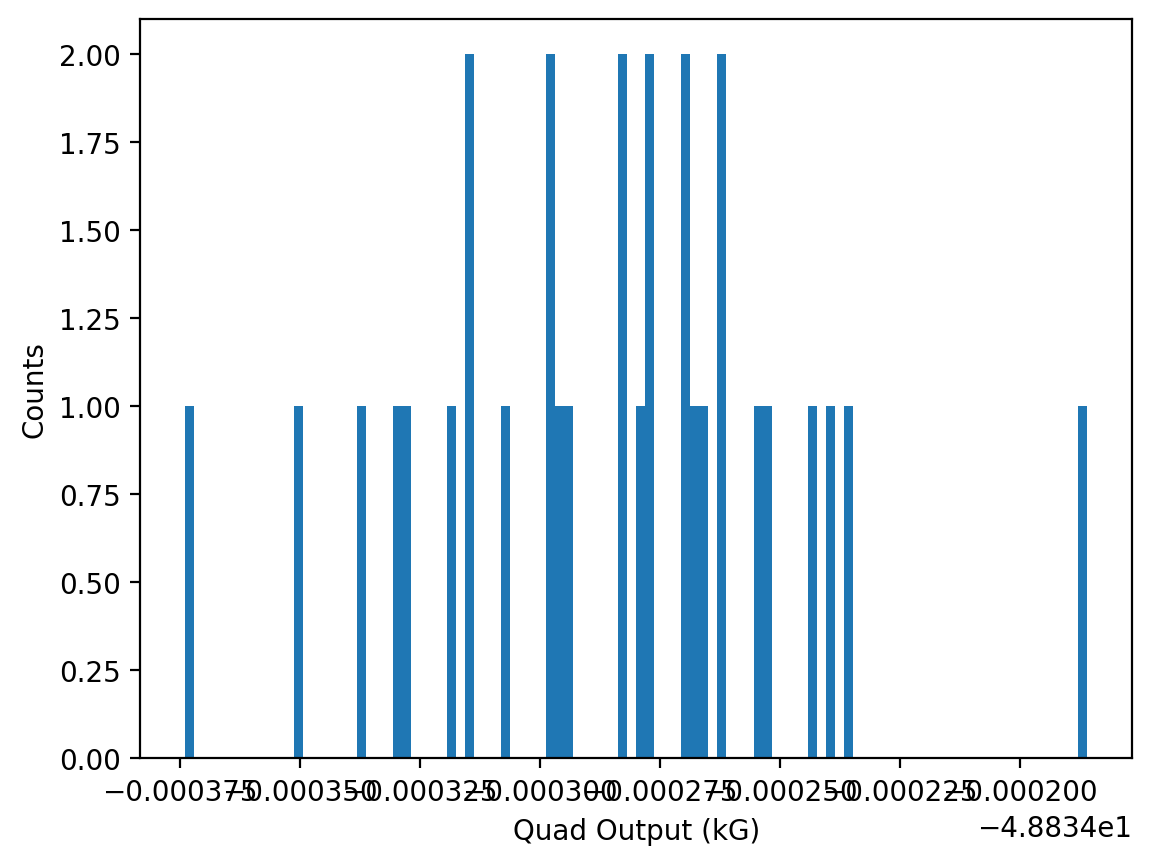

In [42]:
plt.hist(df16["QUAD:LTUH:620:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:301:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

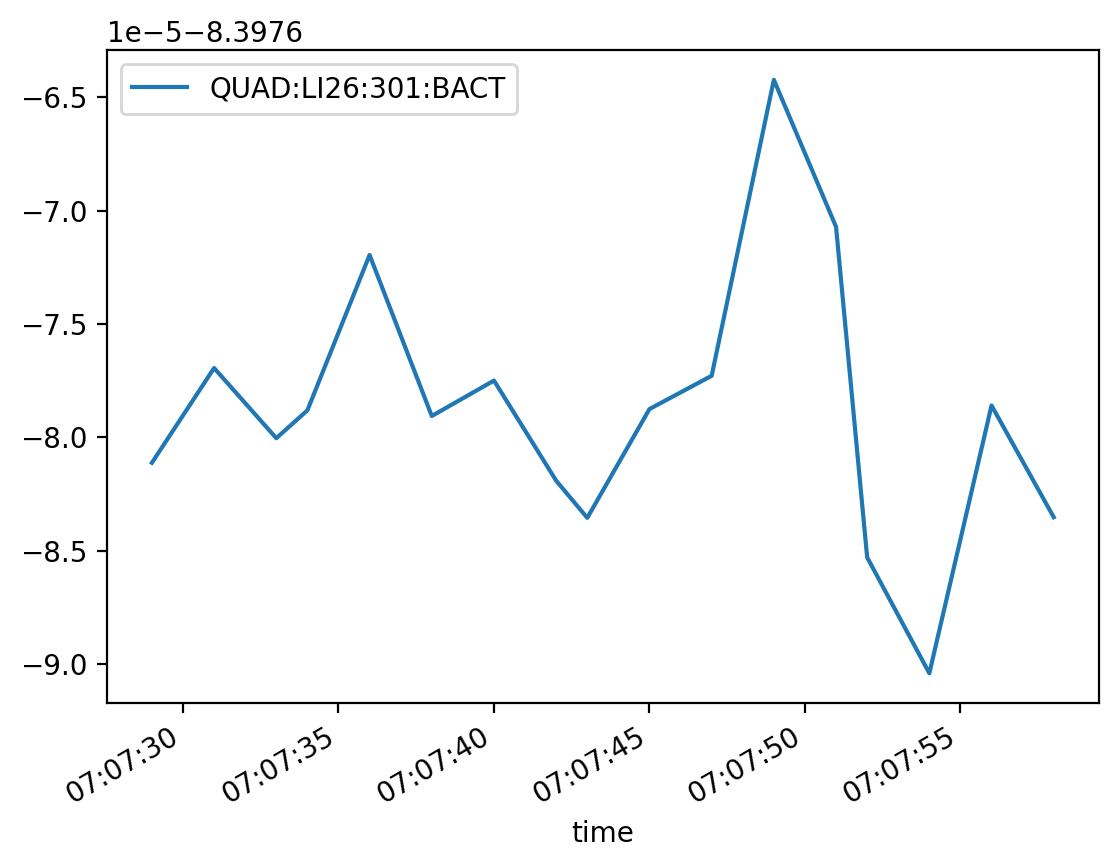

In [43]:
df17 = lcls_archiver_history_dataframe( 'QUAD:LI26:301:BACT', start=t_start, end=t_end)
df17.plot()

Text(0, 0.5, 'Counts')

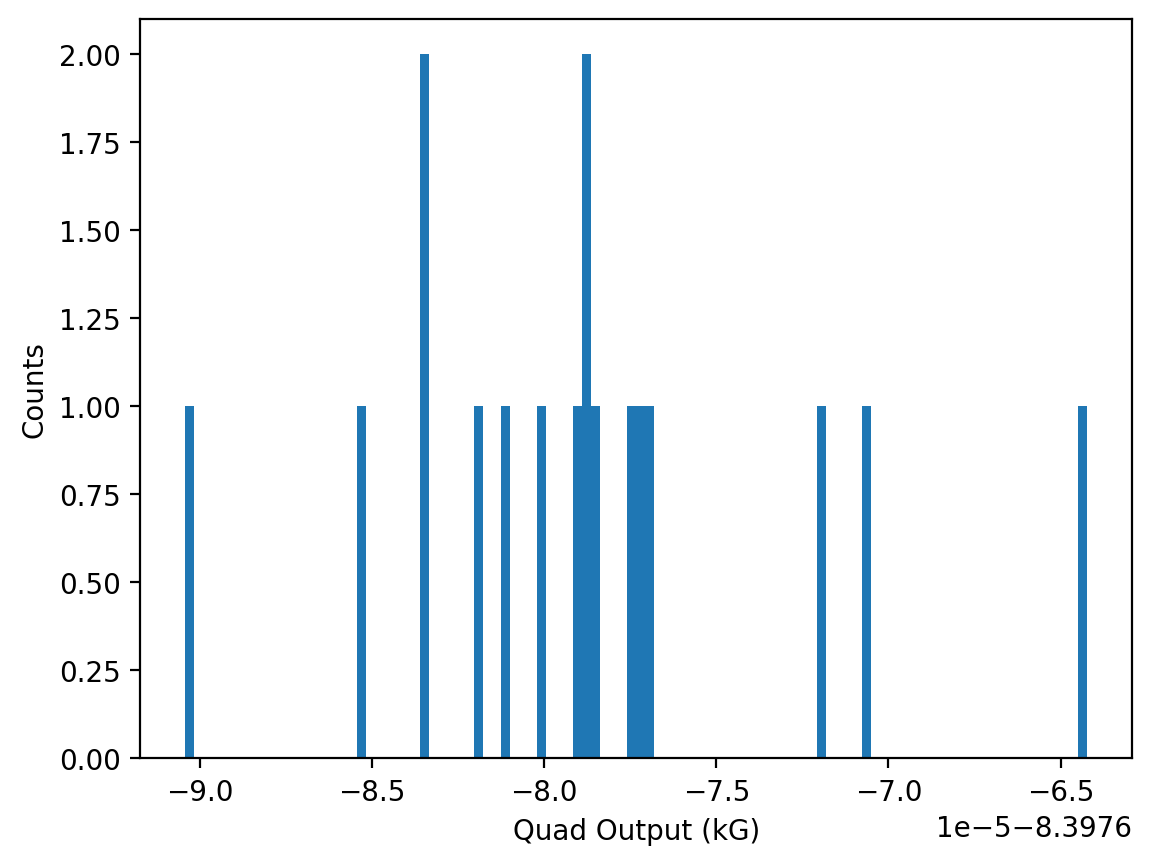

In [44]:
plt.hist(df17["QUAD:LI26:301:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=QUAD:LI26:801:BACT&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

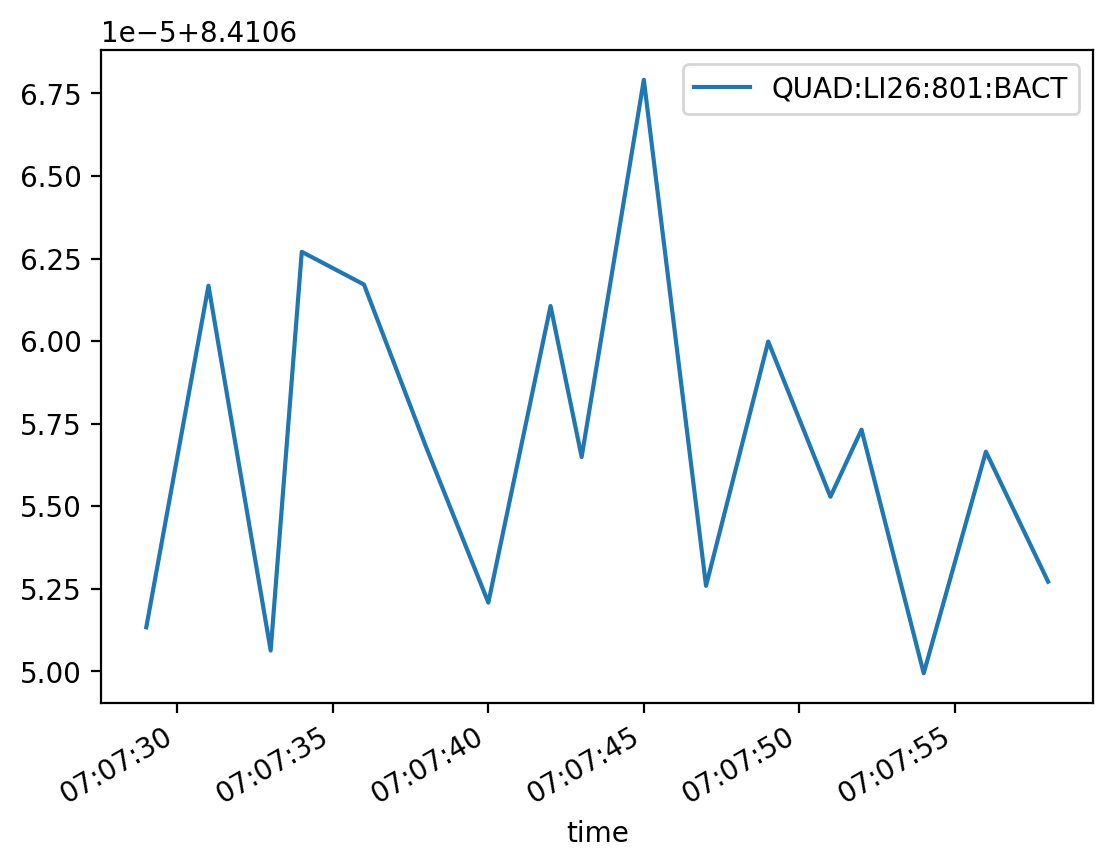

In [45]:
df18 = lcls_archiver_history_dataframe( 'QUAD:LI26:801:BACT', start=t_start, end=t_end)
df18.plot()

Text(0, 0.5, 'Counts')

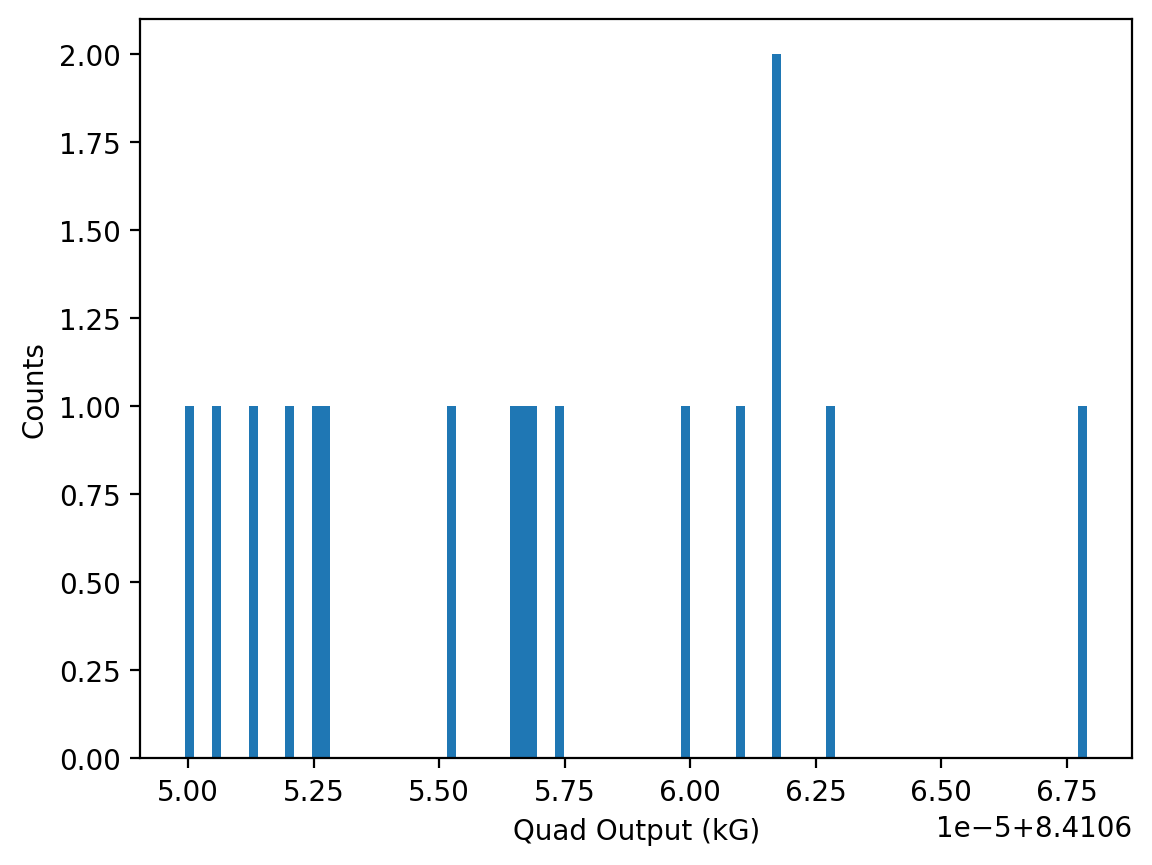

In [46]:
plt.hist(df18["QUAD:LI26:801:BACT"], 100)
plt.xlabel("Quad Output (kG)")
plt.ylabel("Counts")

http://lcls-archapp.slac.stanford.edu/retrieval/data/getData.json?pv=GDET:FEE1:241:ENRC&from=2022-08-07T00:07:30.000000-07:00&to=2022-08-07T00:08:00.000000-07:00


<AxesSubplot:xlabel='time'>

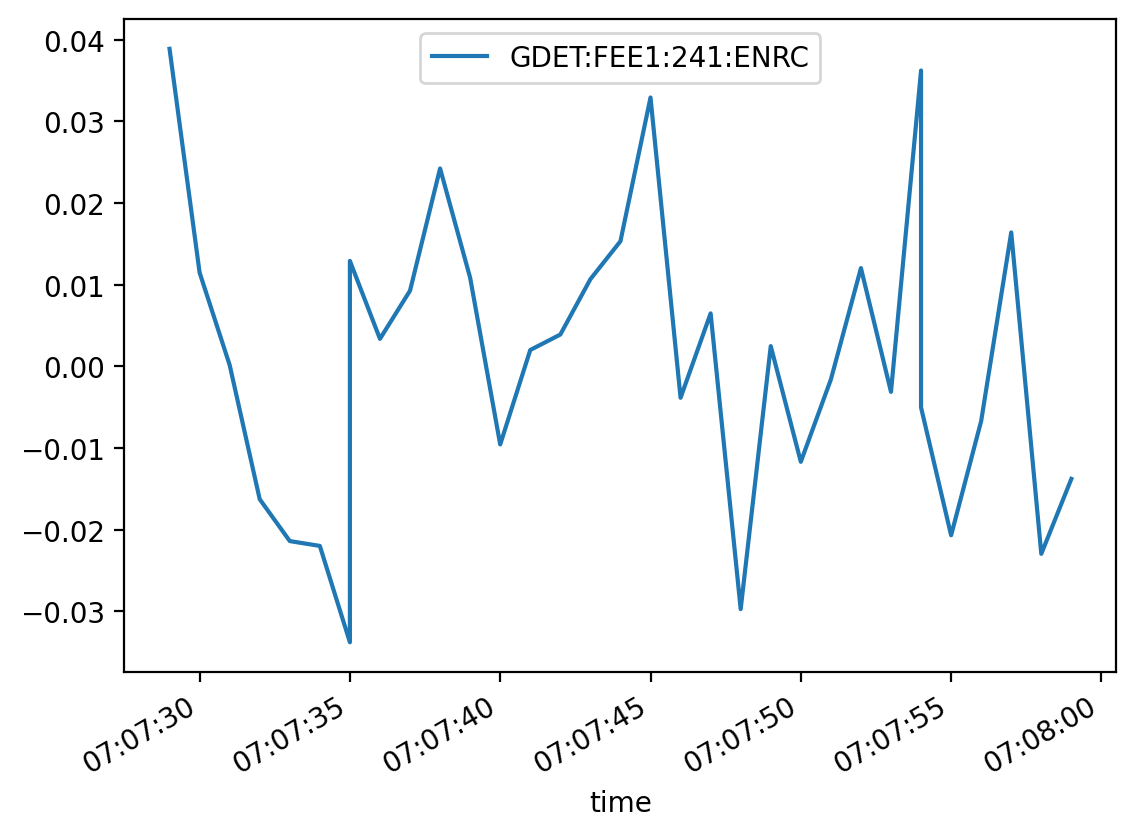

In [47]:
df19 = lcls_archiver_history_dataframe( 'GDET:FEE1:241:ENRC', start=t_start, end=t_end)
df19.plot()

Text(0, 0.5, 'Counts')

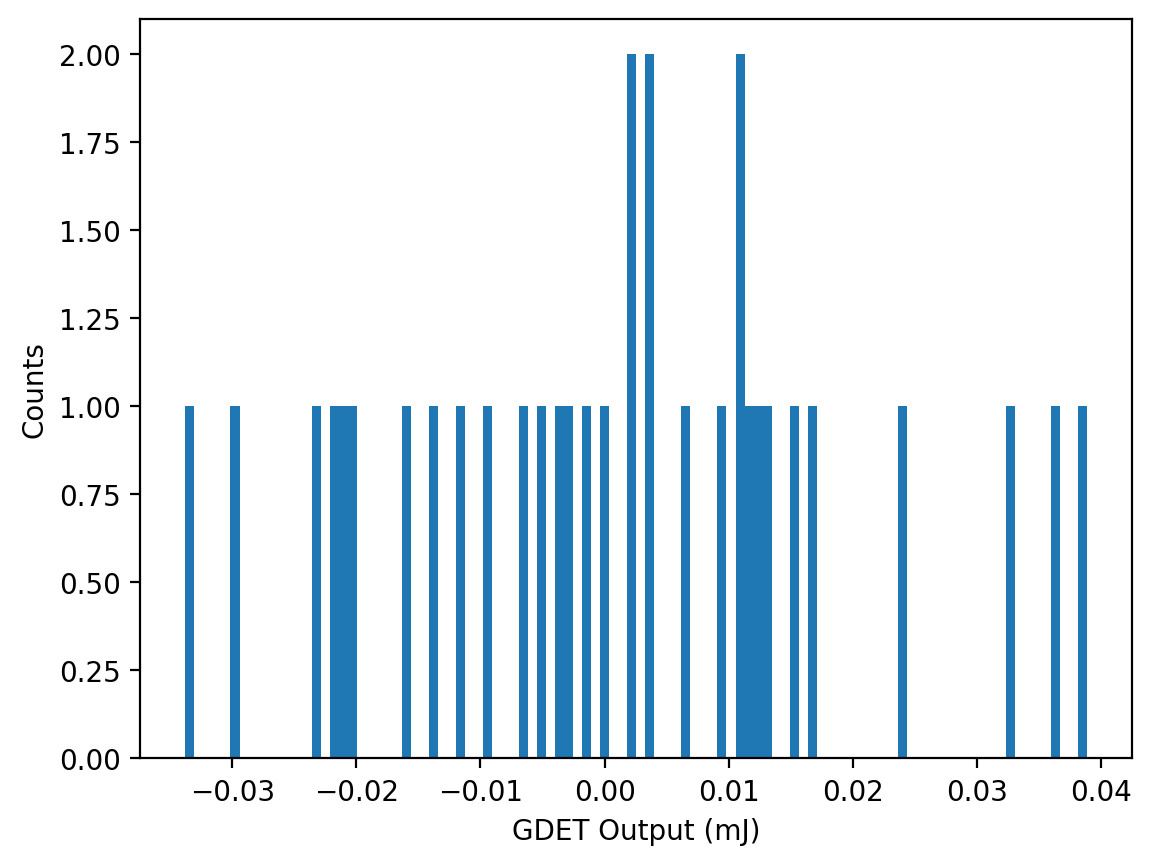

In [48]:
plt.hist(df19["GDET:FEE1:241:ENRC"], 100)
plt.xlabel("GDET Output (mJ)")
plt.ylabel("Counts")